# CVE data analysis

Load the file, remove invalid bulletin dates, convert date fields to datetime so that we can do math operations on them

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import csv

RECENT = False
REMOVE_NAT = False
CATEGORIES = [
    "system",
    "framework",
    "media framework",
    "kernel",
    "runtime",
    "qualcomm",
]

def show_table(table):
  display(HTML(table.to_html()))

cves = "drive/My Drive/cves_temp/aggregated-severity-cat-google-play.csv"
bulletin_dates = "drive/My Drive/cves_temp/bulletin_dates.csv"

date_dict = dict()

with open(bulletin_dates, "r") as csvfile:
  r = csv.reader(csvfile)
  for row in r:
    date_dict[row[0]] = row[1]

df = pd.read_csv(cves)
# filter android version bulletin
df = df[df["bulletin_date"] != "android-13"]
df = df[df["bulletin_date"] != "android-12"]
df = df[df["bulletin_date"] != "android-11"]
df = df[df["bulletin_date"] != "android-10"]
# convert to datetime
#df['bulletin_publish'] = pd.to_datetime(df["bulletin_date"].map(lambda x: date_dict[x]), infer_datetime_format=True, errors='coerce', utc=True)
#df['bulletin_publish'] = pd.to_datetime(df["bulletin_date"].map(lambda x: date_dict[x]), infer_datetime_format=True, errors='coerce', utc=True)
df['bulletin_publish'] = pd.to_datetime(df['bulletin_date'], infer_datetime_format=True, errors='coerce', utc=True)
df['bulletin_date'] = pd.to_datetime(df['bulletin_publish'].to_numpy().astype('datetime64[M]'), infer_datetime_format=True, errors='coerce', utc=True)
df['published'] = pd.to_datetime(df['published'], infer_datetime_format=True, errors='coerce', utc=True)
df['modified'] = pd.to_datetime(df['modified'], infer_datetime_format=True, errors='coerce', utc=True)
df['commit_start'] = pd.to_datetime(df['commit_start'], infer_datetime_format=True, errors='coerce', utc=True)
df['commit_end'] = pd.to_datetime(df['commit_end'], infer_datetime_format=True, errors='coerce', utc=True)
# remove bulletins without categories
df = df[df["bulletin_date"] >= "2017-06-01"]
# filter for recent bulletins
if RECENT:
  df = df[df['bulletin_date'].dt.tz_localize(None) >= np.datetime64('2020-10')]
  df = df[df['bulletin_date'].dt.tz_localize(None) < np.datetime64('2025-01')]
if REMOVE_NAT:
  df = df.dropna(subset=["commit_end"])
# join categories
df["category"] = df["category"] \
  .map(lambda x: "qualcomm" if "qualcomm" in x else x) \
  .map(lambda x: "runtime" if "runtime" in x else x) \
  .map(lambda x: "mediatek" if "mediatek" in x else x) \
  .map(lambda x: "amlogic" if "amlogic" in x else x) \
  .map(lambda x: "kernel" if "kernel" in x else x) \
  .map(lambda x: "library" if "libraries" == x else x) \
  .map(lambda x: "system" if "system ui" == x else x) \
  .map(lambda x: "widevine" if "widevine drm" == x else x)
df.groupby("category")["bulletin_date"].count()

<ipython-input-1-e3e623241ad1>:42: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['bulletin_publish'] = pd.to_datetime(df['bulletin_date'], infer_datetime_format=True, errors='coerce', utc=True)
<ipython-input-1-e3e623241ad1>:43: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  df['bulletin_date'] = pd.to_datetime(df['bulletin_publish'].to_numpy().astype('datetime64[M]'), infer_datetime_format=True, errors='coerce', utc=True)
<ipython-input-1-e3e623241ad1>:43: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this a

,bulletin_date
category,
amlogic,5
android tv,2
arm components,46
bluetooth,2
broadcom components,22
fpc components,9
framework,478
frameworks,1
google play system\n updates,8


## Total Data

### Total number of CVEs


In [2]:
len(df["id"].unique())

4153

In [3]:
df[df['bulletin_date'] > pd.to_datetime('2024-11-30', utc=True)]

,id,bulletin_date,patch_level,category,published,modified,commit_start,commit_end,nvd_severity,nvd_score,nvd_severity_v3,nvd_score_v3,bulletin_publish
2301,CVE-2024-43762,2024-12-01 00:00:00+00:00,2024-12-01,framework,NaT,2025-01-03 21:25:32.529000+00:00,2024-08-29 17:01:55+00:00,2024-10-09 22:52:21+00:00,NaN,NaN,NaN,NaN,2024-12-02 00:00:00+00:00
2302,CVE-2024-43764,2024-12-01 00:00:00+00:00,2024-12-01,framework,NaT,2025-01-03 21:45:43.752000+00:00,2024-02-16 15:14:15+00:00,2024-10-09 22:52:08+00:00,NaN,NaN,NaN,NaN,2024-12-02 00:00:00+00:00
2303,CVE-2024-43769,2024-12-01 00:00:00+00:00,2024-12-01,framework,NaT,2025-01-03 23:00:52.211000+00:00,2024-10-04 16:05:01+00:00,2024-10-14 20:20:25+00:00,NaN,NaN,NaN,NaN,2024-12-02 00:00:00+00:00
2304,CVE-2024-43767,2024-12-01 00:00:00+00:00,2024-12-01,system,NaT,2025-01-03 23:08:19.898000+00:00,2024-08-29 16:47:48+00:00,2024-10-09 22:51:54+00:00,NaN,NaN,NaN,NaN,2024-12-02 00:00:00+00:00
2305,CVE-2024-43097,2024-12-01 00:00:00+00:00,2024-12-01,system,NaT,2025-01-07 04:56:24.367000+00:00,2024-08-29 15:52:35+00:00,2024-10-09 22:52:01+00:00,NaN,NaN,NaN,NaN,2024-12-02 00:00:00+00:00
2306,CVE-2024-43768,2024-12-01 00:00:00+00:00,2024-12-01,system,NaT,2025-01-07 04:56:25.509000+00:00,2024-08-12 19:00:08+00:00,2024-10-09 22:51:44+00:00,NaN,NaN,NaN,NaN,2024-12-02 00:00:00+00:00
2307,CVE-2024-43077,2024-12-01 00:00:00+00:00,2024-12-01,imagination technologies,NaT,2025-01-03 21:20:56.256000+00:00,NaT,NaT,NaN,NaN,NaN,NaN,2024-12-02 00:00:00+00:00
2308,CVE-2024-43701,2024-12-01 00:00:00+00:00,2024-12-01,imagination technologies,NaT,2024-10-15 14:24:07.912000+00:00,NaT,NaT,NaN,NaN,NaN,NaN,2024-12-02 00:00:00+00:00
2309,CVE-2024-20125,2024-12-01 00:00:00+00:00,2024-12-01,mediatek,NaT,2024-12-03 04:55:25.355000+00:00,NaT,NaT,NaN,NaN,NaN,NaN,2024-12-02 00:00:00+00:00
2310,CVE-2024-33063,2024-12-01 00:00:00+00:00,2024-12-01,qualcomm,NaT,2024-12-02 15:40:27.584000+00:00,2024-01-09 10:35:23+00:00,2024-04-09 03:21:49+00:00,NaN,NaN,HIGH,7.5,2024-12-02 00:00:00+00:00


### Number of CVEs affecting system components

These are grouped by bulletin date

In [4]:
df[df["category"] == "system"].groupby("bulletin_date").count()

,id,patch_level,category,published,modified,commit_start,commit_end,nvd_severity,nvd_score,nvd_severity_v3,nvd_score_v3,bulletin_publish
bulletin_date,,,,,,,,,,,,
2017-06-01 00:00:00+00:00,1,1,1,1,1,1,1,1,1,1,1,1
2017-07-01 00:00:00+00:00,5,5,5,0,5,5,5,5,5,5,5,5
2017-09-01 00:00:00+00:00,5,5,5,0,5,5,5,5,5,5,5,5
2017-10-01 00:00:00+00:00,1,1,1,1,1,1,1,1,1,1,1,1
2017-11-01 00:00:00+00:00,11,11,11,9,11,2,2,11,11,11,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01 00:00:00+00:00,1,1,1,0,1,1,1,0,0,1,1,1
2024-09-01 00:00:00+00:00,7,7,7,0,7,7,7,0,0,7,7,7
2024-10-01 00:00:00+00:00,4,4,4,0,0,4,4,0,0,0,0,4


Compute the number of patches that a specific security patch version is missing (from successive security patches)

In [5]:
grouped = df.groupby("bulletin_date").count()
sum = grouped.sort_values("bulletin_date")["id"].cumsum()
sum = -1*(sum - max(sum))
patches = pd.DataFrame(sum).rename(columns={"id":"missing patches"})
patches

,missing patches
bulletin_date,
2017-06-01 00:00:00+00:00,4355
2017-07-01 00:00:00+00:00,4156
2017-08-01 00:00:00+00:00,4058
2017-09-01 00:00:00+00:00,3917
2017-10-01 00:00:00+00:00,3903
...,...
2024-08-01 00:00:00+00:00,122
2024-09-01 00:00:00+00:00,86
2024-10-01 00:00:00+00:00,58


Compute on average how many CVE there are per security patch bulletin

In [6]:
print("mean CVE per security patch")
grouped.mean()["id"]

mean CVE per security patch


49.2967032967033

Compute the average, maximum and minimun time it takes for a patch to be published in the security bulletin after the final commit

In [7]:
#diff = df["bulletin_date"] - df["commit_end"]
diff = df["bulletin_publish"] - df["commit_end"]

df["diff"] = diff
print(diff.mean())
print(diff.median())
print(diff.max())
print(diff.min())

99 days 05:46:26.661381074
55 days 00:40:19
1434 days 21:34:14
-1729 days +03:51:36


Do the same but for specific categories

In [8]:
def print_stats(df):
  for cat in CATEGORIES:
    df_cat = df[df["category"] == cat]
    print(cat)
    print(f"mean: {df_cat['diff'].mean()}")
    print(f"median: {df_cat['diff'].median()}")
    print(f"max: {df_cat['diff'].max()}")
    print(f"min: {df_cat['diff'].min()}")
    print(f"25%: {df_cat['diff'].quantile(0.75)}")
    print(f"CVSS avg. score: {df_cat['nvd_score_v3'].mean()}")

print_stats(df.drop_duplicates(subset=["id"]))

system
mean: 64 days 19:47:55.405864198
median: 53 days 01:08:50
max: 1073 days 22:14:53
min: 16 days 23:39:20
25%: 60 days 18:45:29
CVSS avg. score: 7.280844645550528
framework
mean: 75 days 17:27:21.090128755
median: 53 days 22:29:39
max: 635 days 23:29:55
min: 16 days 23:39:11
25%: 68 days 00:01:17
CVSS avg. score: 7.023027718550105
media framework
mean: 54 days 04:39:20.710037175
median: 47 days 02:14:19
max: 366 days 01:21:24
min: -9 days +06:54:09
25%: 54 days 22:35:40
CVSS avg. score: 7.245774647887323
kernel
mean: 192 days 10:45:22.633986928
median: 138 days 23:41:12
max: 1434 days 21:34:14
min: 46 days 08:59:36
25%: 208 days 15:09:05
CVSS avg. score: 6.958883248730964
runtime
mean: 66 days 14:43:38.250000
median: 53 days 04:56:57
max: 157 days 01:13:09
min: 23 days 01:02:23
25%: 90 days 11:53:57
CVSS avg. score: 7.604545454545456
qualcomm
mean: 184 days 21:45:47.462809916
median: 153 days 20:52:36
max: 990 days 10:02:59
min: -1729 days +03:51:36
25%: 224 days 16:49:30.500000
C

In [9]:
df.drop_duplicates(subset=["id"])

,id,bulletin_date,patch_level,category,published,modified,commit_start,commit_end,nvd_severity,nvd_score,nvd_severity_v3,nvd_score_v3,bulletin_publish,diff
0,CVE-2021-0640,2021-08-01 00:00:00+00:00,2021-08-01,framework,2021-08-17 18:28:56+00:00,2024-08-03 15:47:28.206000+00:00,2021-05-20 03:12:46+00:00,2021-06-16 01:11:15+00:00,MEDIUM,4.6,HIGH,7.8,2021-08-02 00:00:00+00:00,46 days 22:48:45
1,CVE-2021-0645,2021-08-01 00:00:00+00:00,2021-08-01,framework,2021-08-17 18:28:06+00:00,2024-08-03 15:47:28.182000+00:00,2020-12-04 11:20:02+00:00,2021-06-16 01:11:20+00:00,MEDIUM,6.8,HIGH,7.8,2021-08-02 00:00:00+00:00,46 days 22:48:40
2,CVE-2021-0646,2021-08-01 00:00:00+00:00,2021-08-01,framework,2021-08-17 18:28:05+00:00,2024-08-03 15:47:28.248000+00:00,2021-06-03 15:08:20+00:00,2021-06-16 01:11:03+00:00,MEDIUM,4.6,HIGH,7.8,2021-08-02 00:00:00+00:00,46 days 22:48:57
3,CVE-2021-0519,2021-08-01 00:00:00+00:00,2021-08-01,media framework,2021-08-17 18:28:07+00:00,2024-08-03 15:40:01.132000+00:00,2021-03-10 04:33:39+00:00,2021-03-20 15:36:08+00:00,HIGH,7.2,HIGH,7.8,2021-08-02 00:00:00+00:00,134 days 08:23:52
4,CVE-2021-0591,2021-08-01 00:00:00+00:00,2021-08-01,system,2021-08-17 18:28:13+00:00,2024-08-03 15:47:28.227000+00:00,2021-03-12 02:40:20+00:00,2021-05-20 00:01:42+00:00,MEDIUM,6.8,HIGH,7.3,2021-08-02 00:00:00+00:00,73 days 23:58:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4481,CVE-2024-23362,2024-09-01 00:00:00+00:00,2024-09-01,qualcomm,NaT,2024-09-05 03:56:03.375000+00:00,NaT,NaT,NaN,NaN,NaN,NaN,2024-09-03 00:00:00+00:00,NaT
4482,CVE-2024-23364,2024-09-01 00:00:00+00:00,2024-09-01,qualcomm,NaT,2024-09-03 13:17:27.293000+00:00,NaT,NaT,NaN,NaN,NaN,NaN,2024-09-03 00:00:00+00:00,NaT
4483,CVE-2024-23365,2024-09-01 00:00:00+00:00,2024-09-01,qualcomm,NaT,2024-09-05 03:56:04.314000+00:00,NaT,NaT,NaN,NaN,NaN,NaN,2024-09-03 00:00:00+00:00,NaT
4484,CVE-2024-33016,2024-09-01 00:00:00+00:00,2024-09-01,qualcomm,NaT,2024-09-03 14:02:35.440000+00:00,NaT,NaT,NaN,NaN,NaN,NaN,2024-09-03 00:00:00+00:00,NaT


There are some outliers it seems, so maybe we should clean the data?

There are also some patches that are published in the bulletin before the final commit, how does that work?

In [10]:
df[diff < np.timedelta64(0)]

,id,bulletin_date,patch_level,category,published,modified,commit_start,commit_end,nvd_severity,nvd_score,nvd_severity_v3,nvd_score_v3,bulletin_publish,diff
29,CVE-2021-1978,2021-08-01 00:00:00+00:00,2021-08-01,qualcomm,NaT,NaT,2021-01-29 10:38:36+00:00,2021-12-02 08:33:59+00:00,NaN,NaN,NaN,NaN,2021-08-02 00:00:00+00:00,-123 days +15:26:01
618,CVE-2023-33063,2023-12-01 00:00:00+00:00,2023-12-01,qualcomm,NaT,2024-08-02 15:32:46.716000+00:00,2023-04-17 11:38:53+00:00,2024-07-22 06:30:46+00:00,NaN,NaN,HIGH,7.8,2023-12-04 00:00:00+00:00,-232 days +17:29:14
1007,CVE-2022-33280,2023-02-01 00:00:00+00:00,2023-02-01,qualcomm,NaT,2024-08-03 08:01:20.478000+00:00,2022-04-12 06:59:29+00:00,2023-10-09 12:10:15+00:00,NaN,NaN,HIGH,8.8,2023-02-06 00:00:00+00:00,-246 days +11:49:45
1711,CVE-2023-21665,2023-05-01 00:00:00+00:00,2023-05-01,qualcomm,NaT,2024-08-02 09:44:02.226000+00:00,2023-02-14 10:39:02+00:00,2023-09-29 06:37:19+00:00,NaN,NaN,HIGH,7.8,2023-05-01 00:00:00+00:00,-152 days +17:22:41
1712,CVE-2023-21666,2023-05-01 00:00:00+00:00,2023-05-01,qualcomm,NaT,2024-08-02 09:44:02.143000+00:00,2023-02-13 11:21:37+00:00,2023-09-29 06:37:18+00:00,NaN,NaN,HIGH,7.8,2023-05-01 00:00:00+00:00,-152 days +17:22:42
2120,CVE-2017-8236,2017-06-01 00:00:00+00:00,2017-06-01,qualcomm,2017-06-13 20:00:00+00:00,2024-08-05 16:27:23.007000+00:00,2017-03-02 00:08:27+00:00,2022-02-27 20:08:24+00:00,HIGH,9.3,HIGH,7.8,2017-06-05 00:00:00+00:00,-1729 days +03:51:36
2674,CVE-2023-33034,2023-10-01 00:00:00+00:00,2023-10-01,qualcomm,NaT,2024-08-02 15:32:46.714000+00:00,2023-04-05 10:16:55+00:00,2023-10-10 11:54:24+00:00,NaN,NaN,HIGH,7.8,2023-10-02 00:00:00+00:00,-9 days +12:05:36
2711,CVE-2024-23372,2024-07-01 00:00:00+00:00,2024-07-01,qualcomm,NaT,2024-08-01 23:06:24.224000+00:00,2024-01-02 14:09:16+00:00,2024-11-21 06:58:17+00:00,NaN,NaN,HIGH,7.8,2024-07-01 00:00:00+00:00,-144 days +17:01:43
2713,CVE-2024-23380,2024-07-01 00:00:00+00:00,2024-07-01,qualcomm,NaT,2024-08-01 23:06:24.219000+00:00,2023-12-21 09:35:13+00:00,2024-07-30 10:43:50+00:00,NaN,NaN,HIGH,7.8,2024-07-01 00:00:00+00:00,-30 days +13:16:10
2772,CVE-2024-38399,2024-10-01 00:00:00+00:00,2024-10-01,qualcomm,NaT,2024-10-07 13:09:46.180000+00:00,2024-03-19 18:46:31+00:00,2024-11-21 06:58:17+00:00,NaN,NaN,HIGH,7.8,2024-10-07 00:00:00+00:00,-46 days +17:01:43


Count the number of patches that take more than a year after the last commit to be published in the bulletin

In [11]:
df[diff > np.timedelta64(365, 'D')]

,id,bulletin_date,patch_level,category,published,modified,commit_start,commit_end,nvd_severity,nvd_score,nvd_severity_v3,nvd_score_v3,bulletin_publish,diff
12,CVE-2020-14381,2021-08-01 00:00:00+00:00,2021-08-01,kernel,2020-12-03 16:21:55+00:00,2024-08-04 12:46:34.170000+00:00,2020-03-04 10:28:31+00:00,2020-03-06 10:06:15+00:00,MEDIUM,4.6,HIGH,7.8,2021-08-02 00:00:00+00:00,513 days 13:53:45
48,CVE-2023-40112,2023-11-01 00:00:00+00:00,2023-11-01,system,NaT,2024-10-31 13:49:25.722000+00:00,2020-11-23 01:42:27+00:00,2020-11-23 01:45:07+00:00,NaN,NaN,MEDIUM,5.5,2023-11-02 00:00:00+00:00,1073 days 22:14:53
98,CVE-2019-2310,2019-11-01 00:00:00+00:00,2019-11-01,qualcomm,2019-12-12 08:30:42+00:00,2024-08-04 18:49:46.189000+00:00,2018-06-07 10:07:55+00:00,2018-06-25 06:28:49+00:00,MEDIUM,5.0,HIGH,7.5,2019-11-04 00:00:00+00:00,496 days 17:31:11
99,CVE-2019-10545,2019-11-01 00:00:00+00:00,2019-11-01,qualcomm,2019-12-12 08:30:39+00:00,2024-08-04 22:24:18.713000+00:00,2018-09-24 18:35:07+00:00,2018-10-25 15:09:36+00:00,LOW,2.1,MEDIUM,5.5,2019-11-04 00:00:00+00:00,374 days 08:50:24
369,CVE-2020-0030,2020-02-01 00:00:00+00:00,2020-02-01,kernel,2020-02-13 14:22:43+00:00,2024-08-04 05:47:40.791000+00:00,2018-02-16 08:47:15+00:00,2018-02-16 10:16:38+00:00,MEDIUM,6.9,HIGH,7.0,2020-02-03 00:00:00+00:00,716 days 13:43:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3909,CVE-2018-9473,2018-10-01 00:00:00+00:00,2018-10-01,media framework,NaT,2024-09-17 04:09:25.363000+00:00,2017-08-29 06:07:25+00:00,2017-09-29 22:38:36+00:00,HIGH,9.3,HIGH,7.8,2018-10-01 00:00:00+00:00,366 days 01:21:24
4219,CVE-2017-15818,2018-11-01 00:00:00+00:00,2018-11-01,qualcomm,2018-09-18 18:00:00+00:00,2024-08-05 20:04:50.433000+00:00,2017-07-27 07:56:52+00:00,2017-08-24 09:48:22+00:00,HIGH,7.2,HIGH,7.8,2018-11-05 00:00:00+00:00,437 days 14:11:38
4260,CVE-2020-3651,2020-04-01 00:00:00+00:00,2020-04-01,qualcomm,2020-04-16 10:46:20+00:00,2024-08-04 07:37:55.801000+00:00,2018-07-31 12:58:32+00:00,2018-08-07 22:57:28+00:00,HIGH,7.8,HIGH,7.5,2020-04-06 00:00:00+00:00,607 days 01:02:32
4341,CVE-2019-9376,2021-01-01 00:00:00+00:00,2021-01-01,framework,2019-09-27 18:05:17+00:00,2024-08-04 21:46:30.336000+00:00,2019-04-08 23:13:21+00:00,2019-04-09 00:30:05+00:00,MEDIUM,4.9,MEDIUM,5.5,2021-01-04 00:00:00+00:00,635 days 23:29:55


In [12]:
df_late = df[diff > np.timedelta64(180, 'D')]
#df_late = df_late[df_late['bulletin_date'].dt.tz_localize(None) >= np.datetime64('2021-01')]
#df_late = df_late[df_late['bulletin_date'].dt.tz_localize(None) < np.datetime64('2022-01')]
late = len(df_late.index)

df_tot = df
#df_tot = df_tot[df_tot['bulletin_date'].dt.tz_localize(None) >= np.datetime64('2021-01')]
#df_tot = df_tot[df_tot['bulletin_date'].dt.tz_localize(None) < np.datetime64('2022-01')]
tot = len(df_tot.index)
print(f"late: {late}")
print(f"tot: {tot}")
print(f"percent: {late/tot * 100}%")
df_late.groupby("category")["category"].count()

late: 225
tot: 4486
percent: 5.0156041016495765%


,category
category,
framework,21
kernel,53
media framework,4
qualcomm,133
system,14


More than 2 years...


In [13]:
df[diff > np.timedelta64(365 * 2, 'D')]

,id,bulletin_date,patch_level,category,published,modified,commit_start,commit_end,nvd_severity,nvd_score,nvd_severity_v3,nvd_score_v3,bulletin_publish,diff
48,CVE-2023-40112,2023-11-01 00:00:00+00:00,2023-11-01,system,NaT,2024-10-31 13:49:25.722000+00:00,2020-11-23 01:42:27+00:00,2020-11-23 01:45:07+00:00,NaN,NaN,MEDIUM,5.5,2023-11-02 00:00:00+00:00,1073 days 22:14:53
371,CVE-2019-14044,2020-02-01 00:00:00+00:00,2020-02-01,qualcomm,2020-02-07 05:00:37+00:00,2024-08-05 00:05:44.252000+00:00,2017-12-14 20:06:37+00:00,2018-01-19 12:09:41+00:00,HIGH,7.2,HIGH,7.8,2020-02-03 00:00:00+00:00,744 days 11:50:19
402,CVE-2017-18509,2021-02-01 00:00:00+00:00,2021-02-01,kernel,2019-08-13 13:17:36+00:00,2024-08-05 21:28:54.826000+00:00,2017-02-24 08:29:06+00:00,2017-02-27 02:25:46+00:00,HIGH,7.2,HIGH,7.8,2021-02-01 00:00:00+00:00,1434 days 21:34:14
508,CVE-2020-29374,2023-08-01 00:00:00+00:00,2023-08-01,kernel,2020-11-28 06:18:56+00:00,2024-08-04 16:48:01.979000+00:00,2019-03-05 23:43:06+00:00,2020-09-24 15:41:32+00:00,LOW,3.3,LOW,3.6,2023-08-07 00:00:00+00:00,1046 days 08:18:28
2284,CVE-2019-14087,2020-05-01 00:00:00+00:00,2020-05-01,qualcomm,2020-06-02 15:05:43+00:00,2024-08-05 00:12:42.655000+00:00,2017-11-28 21:03:42+00:00,2017-11-29 16:32:28+00:00,HIGH,7.2,HIGH,7.8,2020-05-04 00:00:00+00:00,886 days 07:27:32
2833,CVE-2017-9704,2020-06-01 00:00:00+00:00,2020-06-01,qualcomm,2018-12-20 15:00:00+00:00,2024-08-05 17:18:01.760000+00:00,2017-05-25 09:20:42+00:00,2017-09-14 13:57:01+00:00,HIGH,7.2,HIGH,7.8,2020-06-01 00:00:00+00:00,990 days 10:02:59
3345,CVE-2015-9016,2018-02-01 00:00:00+00:00,2018-02-01,kernel,NaT,NaT,2015-08-09 07:41:51+00:00,2015-08-15 15:45:21+00:00,NaN,NaN,NaN,NaN,2018-02-05 00:00:00+00:00,904 days 08:14:39


Remove outliers and see what the stats are like

In [15]:
diff_clean = diff[diff < np.timedelta64(365, 'D')][diff >= np.timedelta64(0)]
#diff_clean = diff[diff < np.timedelta64(1, 'Y')]
#diff_clean = diff_clean[diff_clean >= np.timedelta64(0)]
print(f"mean: {diff_clean.mean()}")
print(f"max: {diff_clean.max()}")
print(f"min: {diff_clean.min()}")
print(f"median: {diff_clean.median()}")

mean: 85 days 17:54:33.901498929
max: 362 days 09:12:13
min: 16 days 23:39:11
median: 54 days 22:36:01.500000


Do the same for specific categories

In [16]:
df_clean = df.copy()
df_clean["diff"] = diff_clean

print_stats(df_clean)

system
mean: 61 days 21:52:59.255023184
median: 53 days 01:08:16
max: 362 days 09:12:13
min: 16 days 23:39:20
25%: 60 days 05:27:56
CVSS avg. score: 7.283909774436091
framework
mean: 68 days 15:53:48.747276688
median: 53 days 21:35:03
max: 327 days 16:38:16
min: 16 days 23:39:11
25%: 67 days 11:41:53.500000
CVSS avg. score: 7.023027718550105
media framework
mean: 53 days 16:49:55.055970149
median: 47 days 02:14:25
max: 243 days 04:28:33
min: 16 days 23:42:46
25%: 54 days 22:35:40
CVSS avg. score: 7.251228070175438
kernel
mean: 140 days 00:55:02.688405798
median: 121 days 03:45:33.500000
max: 332 days 16:24:03
min: 46 days 08:59:36
25%: 182 days 00:02:03
CVSS avg. score: 6.971499999999999
runtime
mean: 66 days 14:43:38.250000
median: 53 days 04:56:57
max: 157 days 01:13:09
min: 23 days 01:02:23
25%: 90 days 11:53:57
CVSS avg. score: 7.604545454545456
qualcomm
mean: 167 days 02:30:56.511111112
median: 150 days 15:49:52
max: 361 days 22:58:27
min: 19 days 03:05:10
25%: 193 days 17:04:40.5

In [17]:
ids = [
    "CVE-2019-9376",
    "CVE-2021-0313",
    "CVE-2021-0341",
    "CVE-2021-0604",
    "CVE-2021-0444",
    "CVE-2021-0521",
    "CVE-2021-0591",
    "CVE-2018-9493",
    "CVE-2018-9452",
    "CVE-2018-9525",
    "CVE-2018-9548",
    "CVE-2021-0931",
    "CVE-2018-9582",
    "CVE-2019-2003",
    "CVE-2019-2232",
    "CVE-2018-9467",
    "CVE-2020-0239",
    "CVE-2020-0441",
    "CVE-2020-0459",
    "CVE-2020-0391",
    "CVE-2021-1929",
    "CVE-2020-0014",
    "CVE-2019-2137",
    "CVE-2020-0443",
    "CVE-2021-0597",
]

df[df["id"].isin(ids)][["id", "category", "diff", "nvd_score_v3", "nvd_severity_v3"]]

,id,category,diff,nvd_score_v3,nvd_severity_v3
4,CVE-2021-0591,system,73 days 23:58:18,7.3,HIGH
113,CVE-2018-9467,runtime,38 days 05:15:22,9.8,CRITICAL
284,CVE-2021-0521,framework,108 days 05:40:16,5.5,MEDIUM
356,CVE-2020-0014,framework,46 days 17:36:35,5.5,MEDIUM
381,CVE-2021-0341,runtime,47 days 02:13:57,7.5,HIGH
773,CVE-2018-9548,framework,44 days 07:35:51,5.5,MEDIUM
928,CVE-2019-2137,system,53 days 14:04:03,5.5,MEDIUM
1021,CVE-2020-0441,framework,46 days 00:31:08,7.5,HIGH
1026,CVE-2020-0443,framework,46 days 00:31:12,5.5,MEDIUM
1921,CVE-2020-0459,framework,166 days 20:53:45,3.3,LOW


Let's look at the severity of the CVEs

In [18]:
display(df[["id", "nvd_severity_v3"]].groupby("nvd_severity_v3").count())
print(f"mean: {df['nvd_score_v3'].mean()}")
print(f"median: {df['nvd_score_v3'].median()}")


,id
nvd_severity_v3,
CRITICAL,582
HIGH,2447
LOW,32
MEDIUM,1009


mean: 7.505700245700246
median: 7.8


In [19]:
df_severity = df[df["category"].isin(CATEGORIES)]
display(df_severity[["id", "nvd_severity_v3", "category"]].groupby(["category", "nvd_severity_v3"]).count())
print("mean")
display(df_severity[["nvd_score_v3", "category"]].groupby(["category"]).mean())
print("median")
display(df_severity[["nvd_score_v3", "category"]].groupby(["category"]).median())


id
category        nvd_severity_v3      
framework       CRITICAL            6
                HIGH              312
                LOW                10
                MEDIUM            141
kernel          CRITICAL            4
                HIGH              122
                LOW                 3
                MEDIUM             71
media framework CRITICAL            9
                HIGH              180
                MEDIUM             96
qualcomm        CRITICAL          404
                HIGH             1171
                LOW                 3
                MEDIUM            253
runtime         CRITICAL            4
                HIGH               12
                LOW                 1
                MEDIUM              5
system          CRITICAL           73
                HIGH              355
                LOW                 9
                MEDIUM            228

mean


,nvd_score_v3
category,
framework,7.023028
kernel,6.971500
media framework,7.251228
qualcomm,7.877772
runtime,7.604545
system,7.283910


median


,nvd_score_v3
category,
framework,7.80
kernel,7.65
media framework,7.80
qualcomm,7.80
runtime,7.80
system,7.80


In [20]:
print(f"mean: {df['nvd_score_v3'].mean()}")
print(f"median: {df['nvd_score_v3'].median()}")

mean: 7.505700245700246
median: 7.8


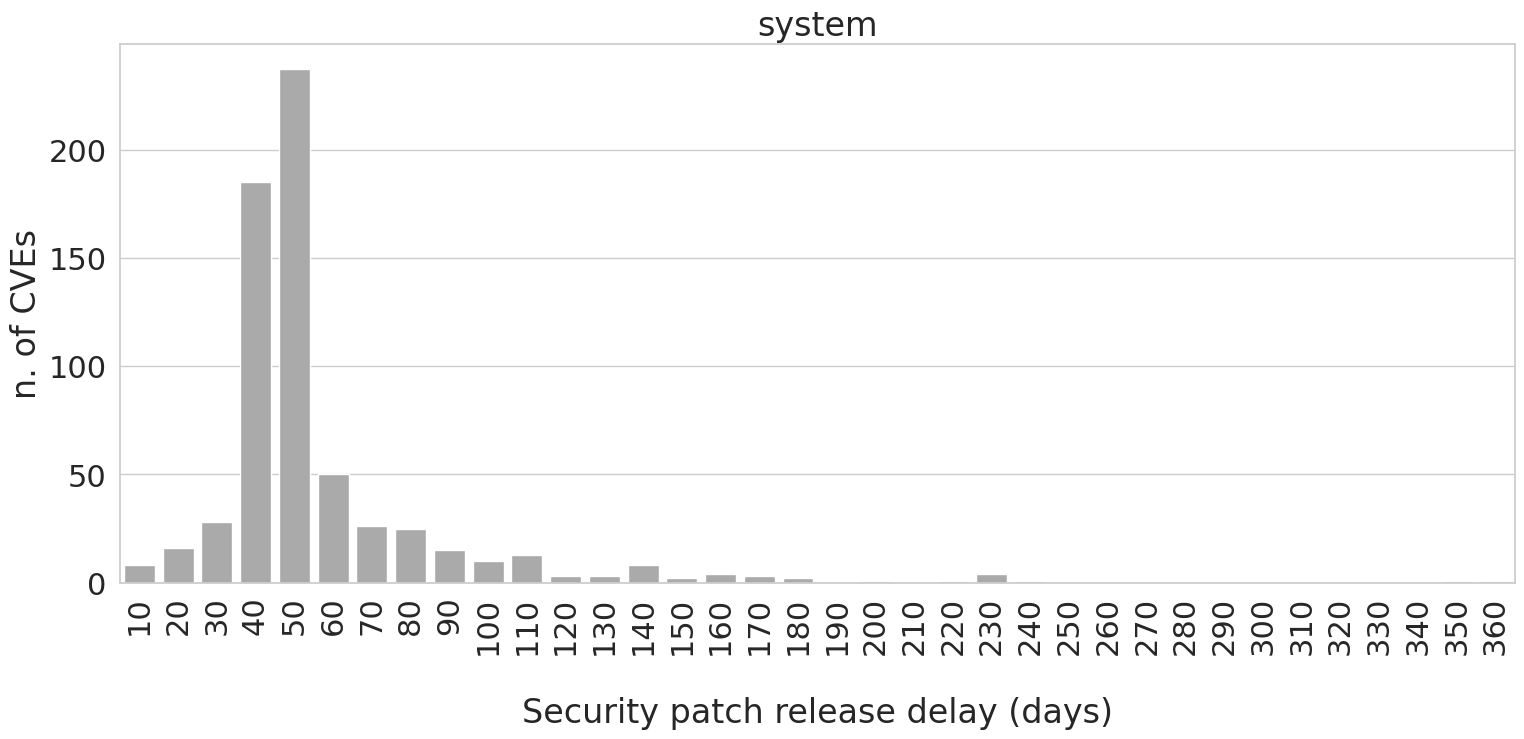

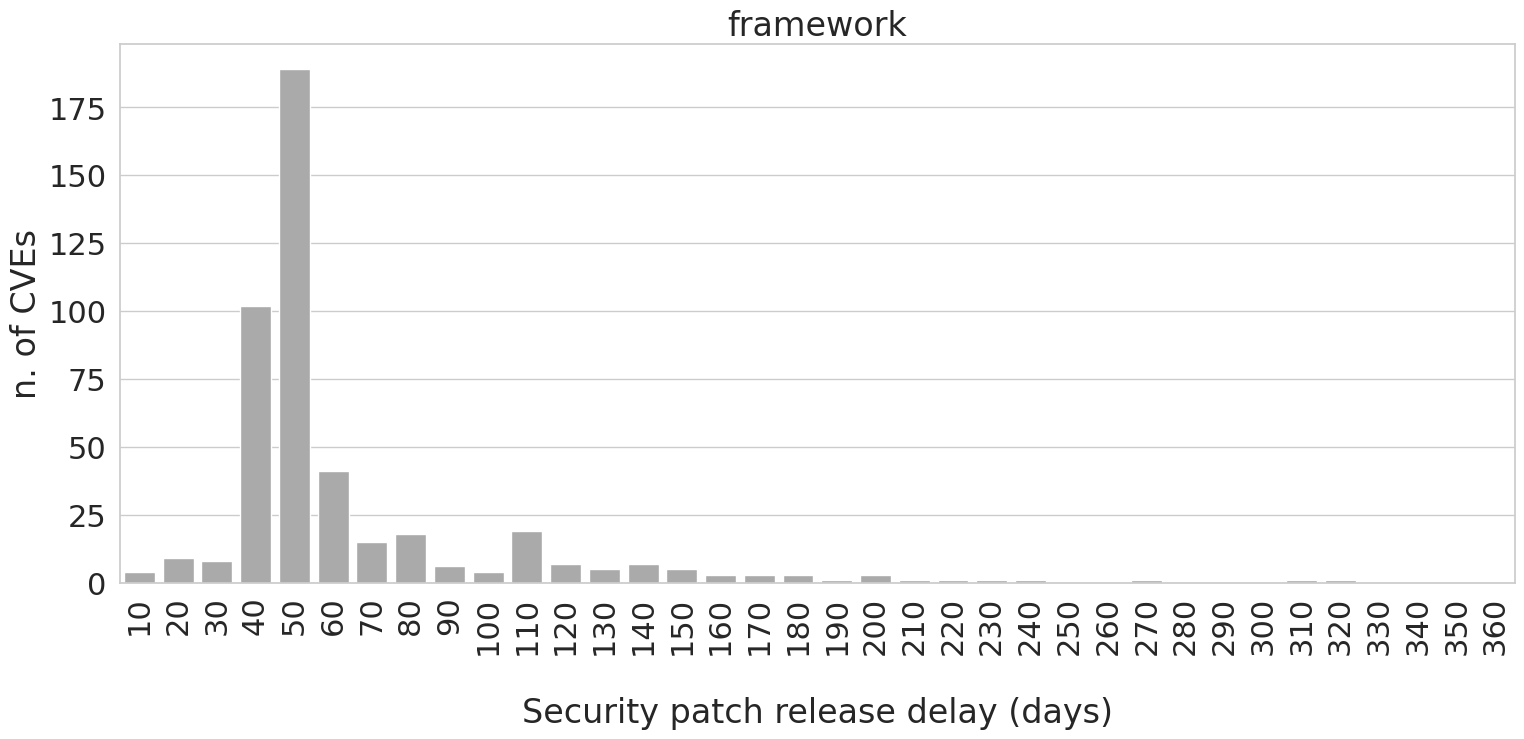

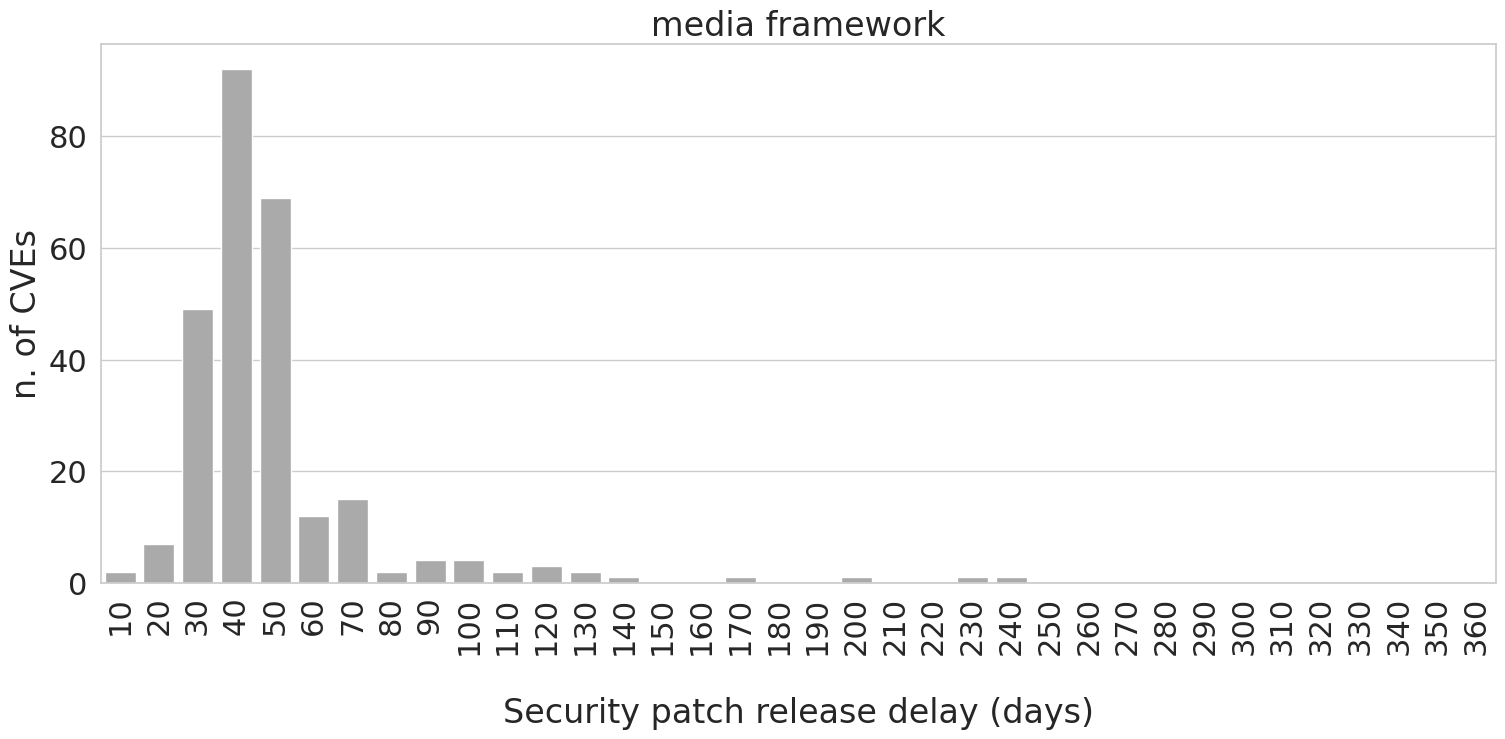

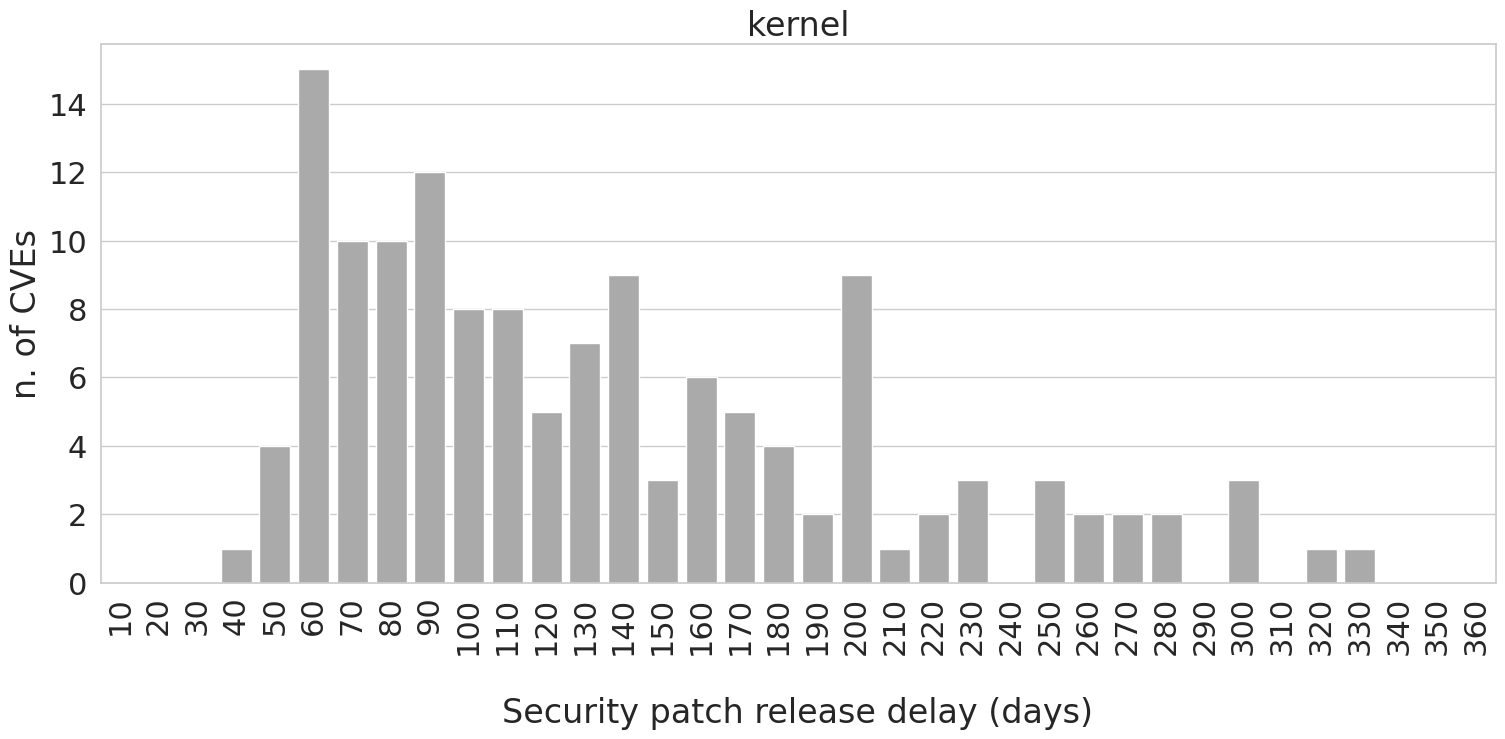

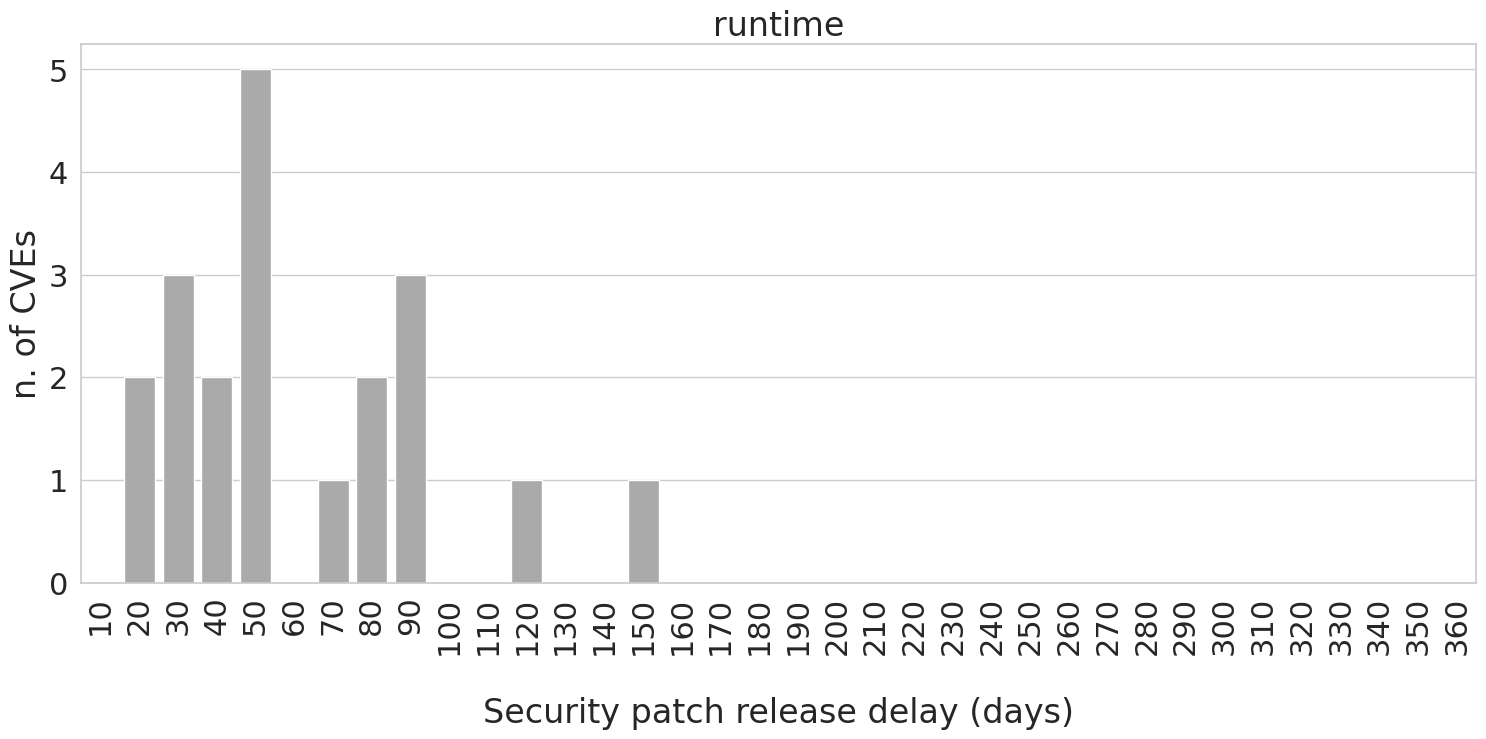

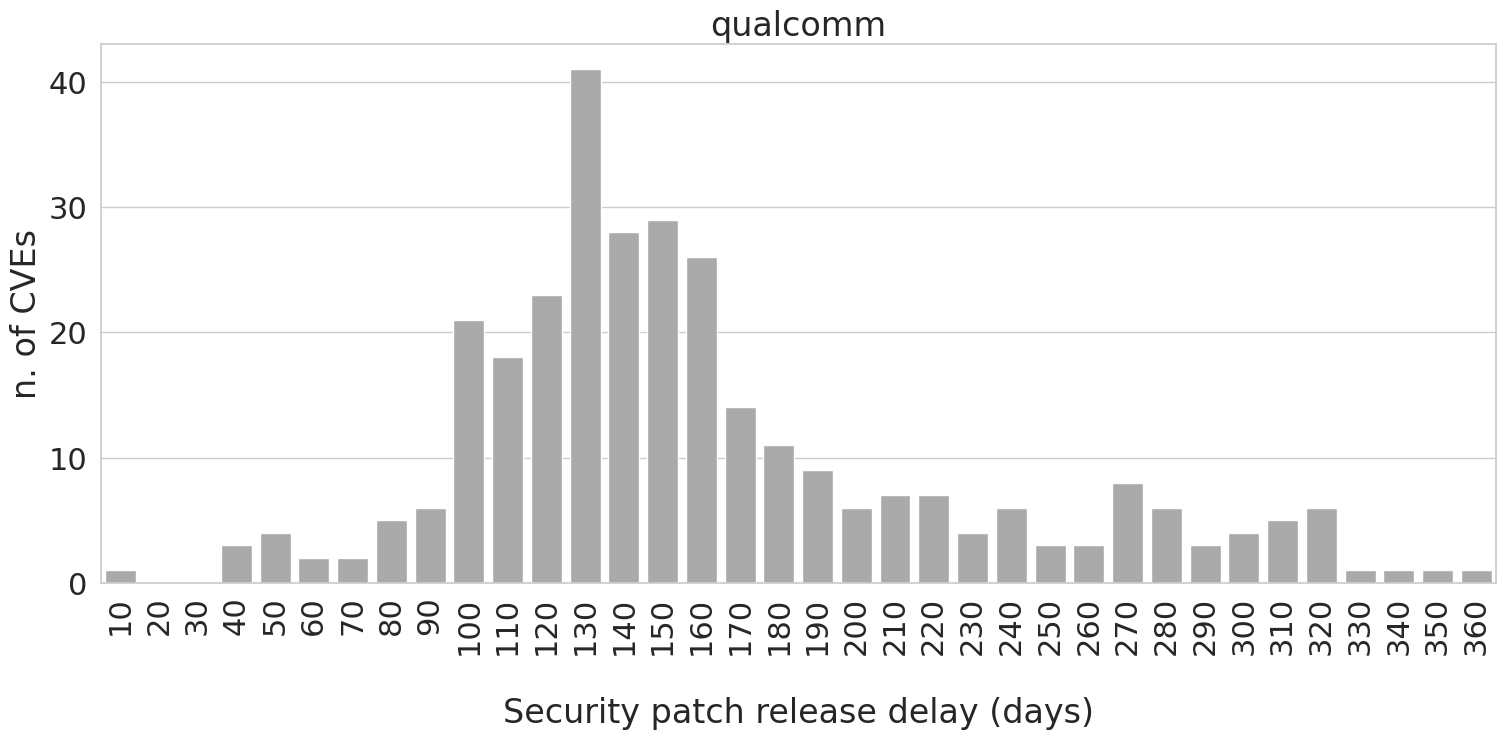

In [21]:
def get_bins(df):
  days = pd.DataFrame(df["diff"].transform(lambda x: x.days)).rename(columns={"diff": "days"})
  days["bin"] = days["days"] // 10 * 10
  arr = days.groupby("bin").count().reset_index().to_numpy()
  last = 10
  full_arr = []
  for row in arr:
    cur = int(row[0])
    while last < cur:
      full_arr.append([last, 0])
      last += 10
    full_arr.append([int(row[0]), row[1]])
    last = cur + 10
  while last <= 360:
    full_arr.append([last, 0])
    last += 10
  return pd.DataFrame(full_arr, columns=["bin", "days"])

def make_cat_plots(df):
  for cat in CATEGORIES:
    df_cat = df[df["category"] == cat]
    sns.set(rc = {'figure.figsize':(18,7),}, style="whitegrid")
    with sns.plotting_context("notebook", font_scale=2):
      # count = pd.DataFrame(days.groupby(lambda x: days.loc[x]["days"] // 10 * 10).count().reset_index()).rename(columns={"days": "n. of CVEs", "index": "Security patch release delay (days)"})
      # count = pd.DataFrame(days.groupby("bin").count().reset_index()).rename(columns={"days": "n. of CVEs", "bin": "Security patch release delay (days)"})
      count = get_bins(df_cat).rename(columns={"days": "n. of CVEs", "bin": "Security patch release delay (days)"})
      ax = sns.barplot(data=count, x="Security patch release delay (days)", y="n. of CVEs", color="#AAA")
      plt.xticks(rotation=90)
      text = ax.get_xlabel()
      plt.xlabel(text, labelpad=30)
      plt.title(cat)
      plt.show()

# days = pd.DataFrame(df_clean["diff"].transform(lambda x: x.days)).rename(columns={"diff": "days"})
# days["bin"] = days["days"] // 10 * 10

make_cat_plots(df_clean)
# get_bins(df_clean[df_clean["category"] == "kernel"])

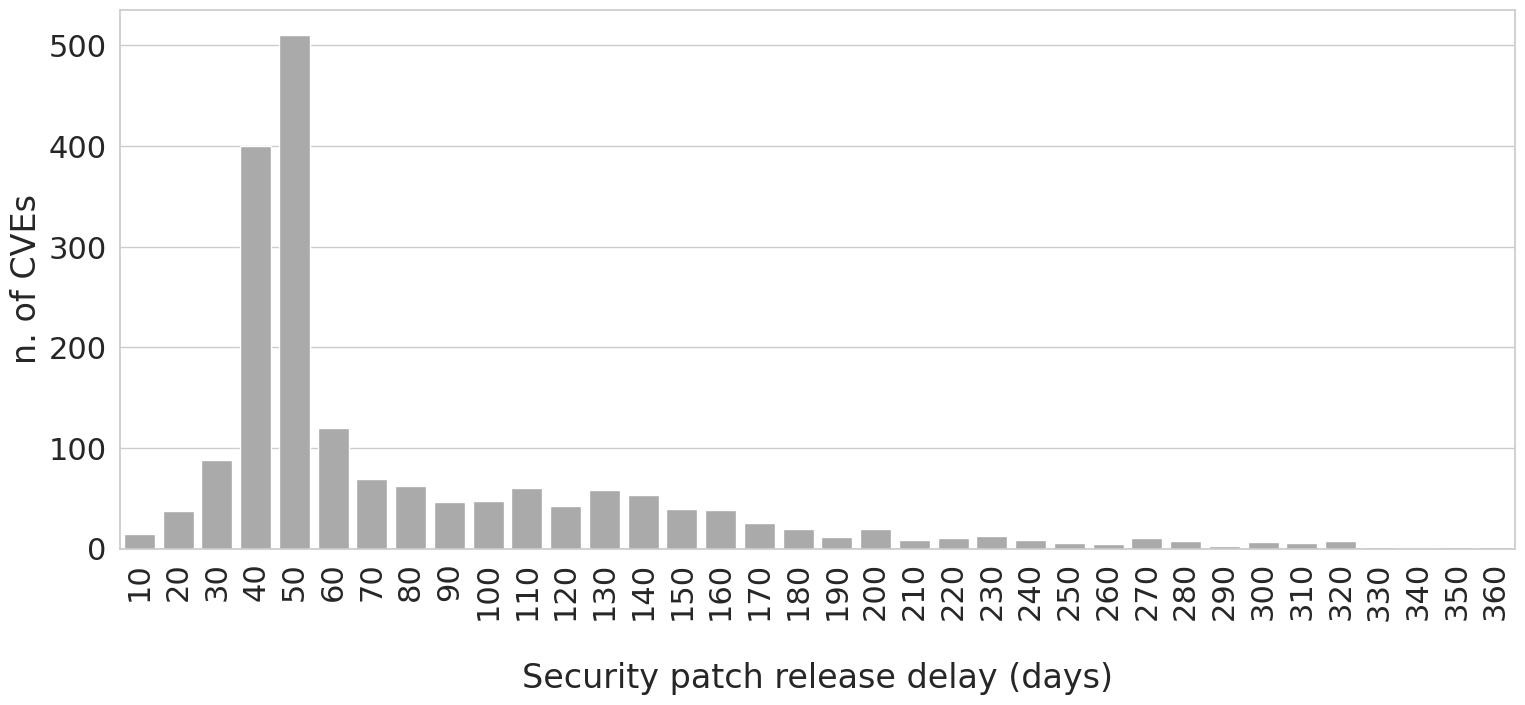

In [22]:
days = pd.DataFrame(diff_clean.transform(lambda x: x.days), columns=["days"])
sns.set(rc = {'figure.figsize':(18,7),}, style="whitegrid")
with sns.plotting_context("notebook", font_scale=2):
  count = pd.DataFrame(days.groupby(lambda x: days.loc[x]["days"] // 10 * 10).count().reset_index()).rename(columns={"days": "n. of CVEs", "index": "Security patch release delay (days)"})
  ax = sns.barplot(data=count, x="Security patch release delay (days)", y="n. of CVEs", color="#AAA")
  plt.xticks(rotation=90)
  text = ax.get_xlabel()
  plt.xlabel(text, labelpad=30)
  #sns.barplot(data=, x="days", y="count")


Some data with CVSS v3

In [23]:
# filter for recent bulletins, may remove

df = df[df['bulletin_date'].dt.tz_localize(None) >= np.datetime64('2018-01')]
df

,id,bulletin_date,patch_level,category,published,modified,commit_start,commit_end,nvd_severity,nvd_score,nvd_severity_v3,nvd_score_v3,bulletin_publish,diff
0,CVE-2021-0640,2021-08-01 00:00:00+00:00,2021-08-01,framework,2021-08-17 18:28:56+00:00,2024-08-03 15:47:28.206000+00:00,2021-05-20 03:12:46+00:00,2021-06-16 01:11:15+00:00,MEDIUM,4.6,HIGH,7.8,2021-08-02 00:00:00+00:00,46 days 22:48:45
1,CVE-2021-0645,2021-08-01 00:00:00+00:00,2021-08-01,framework,2021-08-17 18:28:06+00:00,2024-08-03 15:47:28.182000+00:00,2020-12-04 11:20:02+00:00,2021-06-16 01:11:20+00:00,MEDIUM,6.8,HIGH,7.8,2021-08-02 00:00:00+00:00,46 days 22:48:40
2,CVE-2021-0646,2021-08-01 00:00:00+00:00,2021-08-01,framework,2021-08-17 18:28:05+00:00,2024-08-03 15:47:28.248000+00:00,2021-06-03 15:08:20+00:00,2021-06-16 01:11:03+00:00,MEDIUM,4.6,HIGH,7.8,2021-08-02 00:00:00+00:00,46 days 22:48:57
3,CVE-2021-0519,2021-08-01 00:00:00+00:00,2021-08-01,media framework,2021-08-17 18:28:07+00:00,2024-08-03 15:40:01.132000+00:00,2021-03-10 04:33:39+00:00,2021-03-20 15:36:08+00:00,HIGH,7.2,HIGH,7.8,2021-08-02 00:00:00+00:00,134 days 08:23:52
4,CVE-2021-0591,2021-08-01 00:00:00+00:00,2021-08-01,system,2021-08-17 18:28:13+00:00,2024-08-03 15:47:28.227000+00:00,2021-03-12 02:40:20+00:00,2021-05-20 00:01:42+00:00,MEDIUM,6.8,HIGH,7.3,2021-08-02 00:00:00+00:00,73 days 23:58:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4481,CVE-2024-23362,2024-09-01 00:00:00+00:00,2024-09-01,qualcomm,NaT,2024-09-05 03:56:03.375000+00:00,NaT,NaT,NaN,NaN,NaN,NaN,2024-09-03 00:00:00+00:00,NaT
4482,CVE-2024-23364,2024-09-01 00:00:00+00:00,2024-09-01,qualcomm,NaT,2024-09-03 13:17:27.293000+00:00,NaT,NaT,NaN,NaN,NaN,NaN,2024-09-03 00:00:00+00:00,NaT
4483,CVE-2024-23365,2024-09-01 00:00:00+00:00,2024-09-01,qualcomm,NaT,2024-09-05 03:56:04.314000+00:00,NaT,NaT,NaN,NaN,NaN,NaN,2024-09-03 00:00:00+00:00,NaT
4484,CVE-2024-33016,2024-09-01 00:00:00+00:00,2024-09-01,qualcomm,NaT,2024-09-03 14:02:35.440000+00:00,NaT,NaT,NaN,NaN,NaN,NaN,2024-09-03 00:00:00+00:00,NaT


In [24]:
df["nvd_score_v3"].mean()

7.547628571428571

In [25]:
df[["id", "nvd_severity_v3"]].groupby("nvd_severity_v3").count()

,id
nvd_severity_v3,
CRITICAL,551
HIGH,2071
LOW,29
MEDIUM,849


## Recent Data

We repeat the previous analysis considering only recent bulletins

### Total number of CVEs


In [26]:
CATEGORIES = [
    "system",
    "framework",
    "media framework",
    "kernel",
    "runtime",
    "qualcomm",
]

def show_table(table):
  display(HTML(table.to_html()))

cves = "drive/My Drive/cves_temp/aggregated-severity-cat-google-play.csv"
bulletin_dates = "drive/My Drive/cves_temp/bulletin_dates.csv"

date_dict = dict()

with open(bulletin_dates, "r") as csvfile:
  r = csv.reader(csvfile)
  for row in r:
    date_dict[row[0]] = row[1]

df = pd.read_csv(cves)
# filter android version bulletin
df = df[df["bulletin_date"] != "android-13"]
df = df[df["bulletin_date"] != "android-12"]
df = df[df["bulletin_date"] != "android-11"]
df = df[df["bulletin_date"] != "android-10"]
# convert to datetime
#df['bulletin_publish'] = pd.to_datetime(df["bulletin_date"].map(lambda x: date_dict[x]), infer_datetime_format=True, errors='coerce', utc=True)
#df['bulletin_publish'] = pd.to_datetime(df["bulletin_date"].map(lambda x: date_dict[x]), infer_datetime_format=True, errors='coerce', utc=True)
df['bulletin_publish'] = pd.to_datetime(df['bulletin_date'], infer_datetime_format=True, errors='coerce', utc=True)
df['bulletin_date'] = pd.to_datetime(df['bulletin_publish'].to_numpy().astype('datetime64[M]'), infer_datetime_format=True, errors='coerce', utc=True)
df['published'] = pd.to_datetime(df['published'], infer_datetime_format=True, errors='coerce', utc=True)
df['modified'] = pd.to_datetime(df['modified'], infer_datetime_format=True, errors='coerce', utc=True)
df['commit_start'] = pd.to_datetime(df['commit_start'], infer_datetime_format=True, errors='coerce', utc=True)
df['commit_end'] = pd.to_datetime(df['commit_end'], infer_datetime_format=True, errors='coerce', utc=True)
# remove bulletins without categories
df = df[df["bulletin_date"] >= "2017-06-01"]
# filter for recent bulletins
df = df[df['bulletin_date'].dt.tz_localize(None) >= np.datetime64('2019-10')]
df = df[df['bulletin_date'].dt.tz_localize(None) < np.datetime64('2025-01')]
# join categories
df["category"] = df["category"] \
  .map(lambda x: "qualcomm" if "qualcomm" in x else x) \
  .map(lambda x: "runtime" if "runtime" in x else x) \
  .map(lambda x: "mediatek" if "mediatek" in x else x) \
  .map(lambda x: "amlogic" if "amlogic" in x else x) \
  .map(lambda x: "kernel" if "kernel" in x else x) \
  .map(lambda x: "library" if "libraries" == x else x) \
  .map(lambda x: "system" if "system ui" == x else x) \
  .map(lambda x: "widevine" if "widevine drm" == x else x)
df.groupby("category")["bulletin_date"].count()

<ipython-input-26-efbda8d9b40d>:32: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['bulletin_publish'] = pd.to_datetime(df['bulletin_date'], infer_datetime_format=True, errors='coerce', utc=True)
<ipython-input-26-efbda8d9b40d>:33: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  df['bulletin_date'] = pd.to_datetime(df['bulletin_publish'].to_numpy().astype('datetime64[M]'), infer_datetime_format=True, errors='coerce', utc=True)
<ipython-input-26-efbda8d9b40d>:33: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove thi

,bulletin_date
category,
amlogic,5
android tv,2
arm components,46
broadcom components,4
fpc components,9
framework,411
frameworks,1
google play system\n updates,8
google play system updates,82


In [27]:
len(df["id"].unique())

2596

In [28]:
df[df['bulletin_date'] > pd.to_datetime('2024-11-30', utc=True)]

,id,bulletin_date,patch_level,category,published,modified,commit_start,commit_end,nvd_severity,nvd_score,nvd_severity_v3,nvd_score_v3,bulletin_publish
2301,CVE-2024-43762,2024-12-01 00:00:00+00:00,2024-12-01,framework,NaT,2025-01-03 21:25:32.529000+00:00,2024-08-29 17:01:55+00:00,2024-10-09 22:52:21+00:00,NaN,NaN,NaN,NaN,2024-12-02 00:00:00+00:00
2302,CVE-2024-43764,2024-12-01 00:00:00+00:00,2024-12-01,framework,NaT,2025-01-03 21:45:43.752000+00:00,2024-02-16 15:14:15+00:00,2024-10-09 22:52:08+00:00,NaN,NaN,NaN,NaN,2024-12-02 00:00:00+00:00
2303,CVE-2024-43769,2024-12-01 00:00:00+00:00,2024-12-01,framework,NaT,2025-01-03 23:00:52.211000+00:00,2024-10-04 16:05:01+00:00,2024-10-14 20:20:25+00:00,NaN,NaN,NaN,NaN,2024-12-02 00:00:00+00:00
2304,CVE-2024-43767,2024-12-01 00:00:00+00:00,2024-12-01,system,NaT,2025-01-03 23:08:19.898000+00:00,2024-08-29 16:47:48+00:00,2024-10-09 22:51:54+00:00,NaN,NaN,NaN,NaN,2024-12-02 00:00:00+00:00
2305,CVE-2024-43097,2024-12-01 00:00:00+00:00,2024-12-01,system,NaT,2025-01-07 04:56:24.367000+00:00,2024-08-29 15:52:35+00:00,2024-10-09 22:52:01+00:00,NaN,NaN,NaN,NaN,2024-12-02 00:00:00+00:00
2306,CVE-2024-43768,2024-12-01 00:00:00+00:00,2024-12-01,system,NaT,2025-01-07 04:56:25.509000+00:00,2024-08-12 19:00:08+00:00,2024-10-09 22:51:44+00:00,NaN,NaN,NaN,NaN,2024-12-02 00:00:00+00:00
2307,CVE-2024-43077,2024-12-01 00:00:00+00:00,2024-12-01,imagination technologies,NaT,2025-01-03 21:20:56.256000+00:00,NaT,NaT,NaN,NaN,NaN,NaN,2024-12-02 00:00:00+00:00
2308,CVE-2024-43701,2024-12-01 00:00:00+00:00,2024-12-01,imagination technologies,NaT,2024-10-15 14:24:07.912000+00:00,NaT,NaT,NaN,NaN,NaN,NaN,2024-12-02 00:00:00+00:00
2309,CVE-2024-20125,2024-12-01 00:00:00+00:00,2024-12-01,mediatek,NaT,2024-12-03 04:55:25.355000+00:00,NaT,NaT,NaN,NaN,NaN,NaN,2024-12-02 00:00:00+00:00
2310,CVE-2024-33063,2024-12-01 00:00:00+00:00,2024-12-01,qualcomm,NaT,2024-12-02 15:40:27.584000+00:00,2024-01-09 10:35:23+00:00,2024-04-09 03:21:49+00:00,NaN,NaN,HIGH,7.5,2024-12-02 00:00:00+00:00


Number of CVEs affecting system components, grouped by bulletin date

In [29]:
df[df["category"] == "system"].groupby("bulletin_date").count()

,id,patch_level,category,published,modified,commit_start,commit_end,nvd_severity,nvd_score,nvd_severity_v3,nvd_score_v3,bulletin_publish
bulletin_date,,,,,,,,,,,,
2019-10-01 00:00:00+00:00,2,2,2,2,2,2,2,2,2,2,2,2
2019-11-01 00:00:00+00:00,9,9,9,9,9,9,9,9,9,9,9,9
2019-12-01 00:00:00+00:00,8,8,8,8,8,8,8,8,8,8,8,8
2020-01-01 00:00:00+00:00,3,3,3,3,3,3,3,3,3,3,3,3
2020-02-01 00:00:00+00:00,6,6,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01 00:00:00+00:00,1,1,1,0,1,1,1,0,0,1,1,1
2024-09-01 00:00:00+00:00,7,7,7,0,7,7,7,0,0,7,7,7
2024-10-01 00:00:00+00:00,4,4,4,0,0,4,4,0,0,0,0,4


Compute the number of patches that a specific security patch version is missing (from successive security patches)

In [30]:
grouped = df.groupby("bulletin_date").count()
sum = grouped.sort_values("bulletin_date")["id"].cumsum()
sum = -1*(sum - max(sum))
patches = pd.DataFrame(sum).rename(columns={"id":"missing patches"})
patches

,missing patches
bulletin_date,
2019-10-01 00:00:00+00:00,2665
2019-11-01 00:00:00+00:00,2628
2019-12-01 00:00:00+00:00,2584
2020-01-01 00:00:00+00:00,2543
2020-02-01 00:00:00+00:00,2518
...,...
2024-08-01 00:00:00+00:00,122
2024-09-01 00:00:00+00:00,86
2024-10-01 00:00:00+00:00,58


Compute on average how many CVE there are per security patch bulletin

In [31]:
print("mean CVE per security patch")
grouped.mean()["id"]

mean CVE per security patch


42.76190476190476

Compute the average, maximum and minimun time it takes for a patch to be published in the security bulletin after the final commit

In [32]:
#diff = df["bulletin_date"] - df["commit_end"]
diff = df["bulletin_publish"] - df["commit_end"]

df["diff"] = diff
print(diff.mean())
print(diff.median())
print(diff.max())
print(diff.min())

105 days 17:47:56.664877302
60 days 00:11:12
1434 days 21:34:14
-563 days +10:15:48


Do the same but for specific categories

In [33]:
def print_stats(df):
  for cat in CATEGORIES:
    df_cat = df[df["category"] == cat]
    print(cat)
    print(f"mean: {df_cat['diff'].mean()}")
    print(f"median: {df_cat['diff'].median()}")
    print(f"max: {df_cat['diff'].max()}")
    print(f"min: {df_cat['diff'].min()}")
    print(f"25%: {df_cat['diff'].quantile(0.75)}")
    print(f"CVSS avg. score: {df_cat['nvd_score_v3'].mean()}")

print_stats(df.drop_duplicates(subset=["id"]))

system
mean: 71 days 18:22:25.301310044
median: 53 days 21:33:49.500000
max: 1073 days 22:14:53
min: 30 days 04:01:08
25%: 68 days 01:06:34.500000
CVSS avg. score: 7.166811279826463
framework
mean: 79 days 19:51:20.337468983
median: 54 days 04:53:03
max: 635 days 23:29:55
min: 27 days 08:07:08
25%: 73 days 05:41:23
CVSS avg. score: 6.9733830845771125
media framework
mean: 72 days 01:08:21.525000
median: 54 days 13:44:27
max: 243 days 04:28:33
min: 40 days 00:39:08
25%: 77 days 00:19:13
CVSS avg. score: 7.199999999999999
kernel
mean: 190 days 16:30:24.280701754
median: 117 days 13:08:53
max: 1434 days 21:34:14
min: 46 days 08:59:36
25%: 208 days 15:09:05.750000
CVSS avg. score: 6.821666666666666
runtime
mean: 85 days 22:31:10.500000
median: 87 days 15:40:18
max: 157 days 01:13:09
min: 47 days 02:13:57
25%: 95 days 09:40:19.750000
CVSS avg. score: 7.685714285714285
qualcomm
mean: 189 days 00:01:27.891304348
median: 152 days 02:17:01
max: 990 days 10:02:59
min: -563 days +10:15:48
25%: 20

In [34]:
df.drop_duplicates(subset=["id"])

,id,bulletin_date,patch_level,category,published,modified,commit_start,commit_end,nvd_severity,nvd_score,nvd_severity_v3,nvd_score_v3,bulletin_publish,diff
0,CVE-2021-0640,2021-08-01 00:00:00+00:00,2021-08-01,framework,2021-08-17 18:28:56+00:00,2024-08-03 15:47:28.206000+00:00,2021-05-20 03:12:46+00:00,2021-06-16 01:11:15+00:00,MEDIUM,4.6,HIGH,7.8,2021-08-02 00:00:00+00:00,46 days 22:48:45
1,CVE-2021-0645,2021-08-01 00:00:00+00:00,2021-08-01,framework,2021-08-17 18:28:06+00:00,2024-08-03 15:47:28.182000+00:00,2020-12-04 11:20:02+00:00,2021-06-16 01:11:20+00:00,MEDIUM,6.8,HIGH,7.8,2021-08-02 00:00:00+00:00,46 days 22:48:40
2,CVE-2021-0646,2021-08-01 00:00:00+00:00,2021-08-01,framework,2021-08-17 18:28:05+00:00,2024-08-03 15:47:28.248000+00:00,2021-06-03 15:08:20+00:00,2021-06-16 01:11:03+00:00,MEDIUM,4.6,HIGH,7.8,2021-08-02 00:00:00+00:00,46 days 22:48:57
3,CVE-2021-0519,2021-08-01 00:00:00+00:00,2021-08-01,media framework,2021-08-17 18:28:07+00:00,2024-08-03 15:40:01.132000+00:00,2021-03-10 04:33:39+00:00,2021-03-20 15:36:08+00:00,HIGH,7.2,HIGH,7.8,2021-08-02 00:00:00+00:00,134 days 08:23:52
4,CVE-2021-0591,2021-08-01 00:00:00+00:00,2021-08-01,system,2021-08-17 18:28:13+00:00,2024-08-03 15:47:28.227000+00:00,2021-03-12 02:40:20+00:00,2021-05-20 00:01:42+00:00,MEDIUM,6.8,HIGH,7.3,2021-08-02 00:00:00+00:00,73 days 23:58:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4481,CVE-2024-23362,2024-09-01 00:00:00+00:00,2024-09-01,qualcomm,NaT,2024-09-05 03:56:03.375000+00:00,NaT,NaT,NaN,NaN,NaN,NaN,2024-09-03 00:00:00+00:00,NaT
4482,CVE-2024-23364,2024-09-01 00:00:00+00:00,2024-09-01,qualcomm,NaT,2024-09-03 13:17:27.293000+00:00,NaT,NaT,NaN,NaN,NaN,NaN,2024-09-03 00:00:00+00:00,NaT
4483,CVE-2024-23365,2024-09-01 00:00:00+00:00,2024-09-01,qualcomm,NaT,2024-09-05 03:56:04.314000+00:00,NaT,NaT,NaN,NaN,NaN,NaN,2024-09-03 00:00:00+00:00,NaT
4484,CVE-2024-33016,2024-09-01 00:00:00+00:00,2024-09-01,qualcomm,NaT,2024-09-03 14:02:35.440000+00:00,NaT,NaT,NaN,NaN,NaN,NaN,2024-09-03 00:00:00+00:00,NaT


There are some outliers it seems, so maybe we should clean the data?

There are also some patches that are published in the bulletin before the final commit, how does that work?

In [35]:
df[diff < np.timedelta64(0)]

,id,bulletin_date,patch_level,category,published,modified,commit_start,commit_end,nvd_severity,nvd_score,nvd_severity_v3,nvd_score_v3,bulletin_publish,diff
29,CVE-2021-1978,2021-08-01 00:00:00+00:00,2021-08-01,qualcomm,NaT,NaT,2021-01-29 10:38:36+00:00,2021-12-02 08:33:59+00:00,NaN,NaN,NaN,NaN,2021-08-02 00:00:00+00:00,-123 days +15:26:01
618,CVE-2023-33063,2023-12-01 00:00:00+00:00,2023-12-01,qualcomm,NaT,2024-08-02 15:32:46.716000+00:00,2023-04-17 11:38:53+00:00,2024-07-22 06:30:46+00:00,NaN,NaN,HIGH,7.8,2023-12-04 00:00:00+00:00,-232 days +17:29:14
1007,CVE-2022-33280,2023-02-01 00:00:00+00:00,2023-02-01,qualcomm,NaT,2024-08-03 08:01:20.478000+00:00,2022-04-12 06:59:29+00:00,2023-10-09 12:10:15+00:00,NaN,NaN,HIGH,8.8,2023-02-06 00:00:00+00:00,-246 days +11:49:45
1711,CVE-2023-21665,2023-05-01 00:00:00+00:00,2023-05-01,qualcomm,NaT,2024-08-02 09:44:02.226000+00:00,2023-02-14 10:39:02+00:00,2023-09-29 06:37:19+00:00,NaN,NaN,HIGH,7.8,2023-05-01 00:00:00+00:00,-152 days +17:22:41
1712,CVE-2023-21666,2023-05-01 00:00:00+00:00,2023-05-01,qualcomm,NaT,2024-08-02 09:44:02.143000+00:00,2023-02-13 11:21:37+00:00,2023-09-29 06:37:18+00:00,NaN,NaN,HIGH,7.8,2023-05-01 00:00:00+00:00,-152 days +17:22:42
2674,CVE-2023-33034,2023-10-01 00:00:00+00:00,2023-10-01,qualcomm,NaT,2024-08-02 15:32:46.714000+00:00,2023-04-05 10:16:55+00:00,2023-10-10 11:54:24+00:00,NaN,NaN,HIGH,7.8,2023-10-02 00:00:00+00:00,-9 days +12:05:36
2711,CVE-2024-23372,2024-07-01 00:00:00+00:00,2024-07-01,qualcomm,NaT,2024-08-01 23:06:24.224000+00:00,2024-01-02 14:09:16+00:00,2024-11-21 06:58:17+00:00,NaN,NaN,HIGH,7.8,2024-07-01 00:00:00+00:00,-144 days +17:01:43
2713,CVE-2024-23380,2024-07-01 00:00:00+00:00,2024-07-01,qualcomm,NaT,2024-08-01 23:06:24.219000+00:00,2023-12-21 09:35:13+00:00,2024-07-30 10:43:50+00:00,NaN,NaN,HIGH,7.8,2024-07-01 00:00:00+00:00,-30 days +13:16:10
2772,CVE-2024-38399,2024-10-01 00:00:00+00:00,2024-10-01,qualcomm,NaT,2024-10-07 13:09:46.180000+00:00,2024-03-19 18:46:31+00:00,2024-11-21 06:58:17+00:00,NaN,NaN,HIGH,7.8,2024-10-07 00:00:00+00:00,-46 days +17:01:43
2885,CVE-2019-2304,2019-12-01 00:00:00+00:00,2019-12-01,qualcomm,2019-12-18 05:25:51+00:00,2024-08-04 18:49:46.205000+00:00,2018-10-17 16:36:11+00:00,2021-06-16 13:44:12+00:00,HIGH,7.2,HIGH,7.8,2019-12-02 00:00:00+00:00,-563 days +10:15:48


Count the number of patches that take more than a year after the last commit to be published in the bulletin

In [36]:
df[diff > np.timedelta64(365, 'D')]

,id,bulletin_date,patch_level,category,published,modified,commit_start,commit_end,nvd_severity,nvd_score,nvd_severity_v3,nvd_score_v3,bulletin_publish,diff
12,CVE-2020-14381,2021-08-01 00:00:00+00:00,2021-08-01,kernel,2020-12-03 16:21:55+00:00,2024-08-04 12:46:34.170000+00:00,2020-03-04 10:28:31+00:00,2020-03-06 10:06:15+00:00,MEDIUM,4.6,HIGH,7.8,2021-08-02 00:00:00+00:00,513 days 13:53:45
48,CVE-2023-40112,2023-11-01 00:00:00+00:00,2023-11-01,system,NaT,2024-10-31 13:49:25.722000+00:00,2020-11-23 01:42:27+00:00,2020-11-23 01:45:07+00:00,NaN,NaN,MEDIUM,5.5,2023-11-02 00:00:00+00:00,1073 days 22:14:53
98,CVE-2019-2310,2019-11-01 00:00:00+00:00,2019-11-01,qualcomm,2019-12-12 08:30:42+00:00,2024-08-04 18:49:46.189000+00:00,2018-06-07 10:07:55+00:00,2018-06-25 06:28:49+00:00,MEDIUM,5.0,HIGH,7.5,2019-11-04 00:00:00+00:00,496 days 17:31:11
99,CVE-2019-10545,2019-11-01 00:00:00+00:00,2019-11-01,qualcomm,2019-12-12 08:30:39+00:00,2024-08-04 22:24:18.713000+00:00,2018-09-24 18:35:07+00:00,2018-10-25 15:09:36+00:00,LOW,2.1,MEDIUM,5.5,2019-11-04 00:00:00+00:00,374 days 08:50:24
369,CVE-2020-0030,2020-02-01 00:00:00+00:00,2020-02-01,kernel,2020-02-13 14:22:43+00:00,2024-08-04 05:47:40.791000+00:00,2018-02-16 08:47:15+00:00,2018-02-16 10:16:38+00:00,MEDIUM,6.9,HIGH,7.0,2020-02-03 00:00:00+00:00,716 days 13:43:22
371,CVE-2019-14044,2020-02-01 00:00:00+00:00,2020-02-01,qualcomm,2020-02-07 05:00:37+00:00,2024-08-05 00:05:44.252000+00:00,2017-12-14 20:06:37+00:00,2018-01-19 12:09:41+00:00,HIGH,7.2,HIGH,7.8,2020-02-03 00:00:00+00:00,744 days 11:50:19
373,CVE-2019-14049,2020-02-01 00:00:00+00:00,2020-02-01,qualcomm,2020-02-07 05:00:38+00:00,2024-08-05 00:05:44.207000+00:00,2018-09-06 23:15:41+00:00,2018-10-10 07:01:08+00:00,HIGH,7.2,HIGH,7.8,2020-02-03 00:00:00+00:00,480 days 16:58:52
374,CVE-2019-14055,2020-02-01 00:00:00+00:00,2020-02-01,qualcomm,2020-02-07 05:00:39+00:00,2024-08-05 00:05:44.169000+00:00,2018-11-23 05:11:41+00:00,2019-01-18 05:25:33+00:00,HIGH,7.2,HIGH,7.8,2020-02-03 00:00:00+00:00,380 days 18:34:27
402,CVE-2017-18509,2021-02-01 00:00:00+00:00,2021-02-01,kernel,2019-08-13 13:17:36+00:00,2024-08-05 21:28:54.826000+00:00,2017-02-24 08:29:06+00:00,2017-02-27 02:25:46+00:00,HIGH,7.2,HIGH,7.8,2021-02-01 00:00:00+00:00,1434 days 21:34:14
408,CVE-2020-11297,2021-02-01 00:00:00+00:00,2021-02-01,qualcomm,2021-02-22 06:26:07+00:00,2024-08-04 11:28:13.877000+00:00,2019-12-18 06:59:28+00:00,2020-01-07 11:26:53+00:00,HIGH,7.8,HIGH,7.5,2021-02-01 00:00:00+00:00,390 days 12:33:07


In [37]:
df_late = df[diff > np.timedelta64(180, 'D')]
#df_late = df_late[df_late['bulletin_date'].dt.tz_localize(None) >= np.datetime64('2021-01')]
#df_late = df_late[df_late['bulletin_date'].dt.tz_localize(None) < np.datetime64('2022-01')]
late = len(df_late.index)

df_tot = df
#df_tot = df_tot[df_tot['bulletin_date'].dt.tz_localize(None) >= np.datetime64('2021-01')]
#df_tot = df_tot[df_tot['bulletin_date'].dt.tz_localize(None) < np.datetime64('2022-01')]
tot = len(df_tot.index)
print(f"late: {late}")
print(f"tot: {tot}")
print(f"percent: {late/tot * 100}%")
df_late.groupby("category")["category"].count()

late: 147
tot: 2694
percent: 5.456570155902004%


,category
category,
framework,21
kernel,37
media framework,3
qualcomm,72
system,14


More than 2 years...


In [38]:
df[diff > np.timedelta64(365 * 2, 'D')]

,id,bulletin_date,patch_level,category,published,modified,commit_start,commit_end,nvd_severity,nvd_score,nvd_severity_v3,nvd_score_v3,bulletin_publish,diff
48,CVE-2023-40112,2023-11-01 00:00:00+00:00,2023-11-01,system,NaT,2024-10-31 13:49:25.722000+00:00,2020-11-23 01:42:27+00:00,2020-11-23 01:45:07+00:00,NaN,NaN,MEDIUM,5.5,2023-11-02 00:00:00+00:00,1073 days 22:14:53
371,CVE-2019-14044,2020-02-01 00:00:00+00:00,2020-02-01,qualcomm,2020-02-07 05:00:37+00:00,2024-08-05 00:05:44.252000+00:00,2017-12-14 20:06:37+00:00,2018-01-19 12:09:41+00:00,HIGH,7.2,HIGH,7.8,2020-02-03 00:00:00+00:00,744 days 11:50:19
402,CVE-2017-18509,2021-02-01 00:00:00+00:00,2021-02-01,kernel,2019-08-13 13:17:36+00:00,2024-08-05 21:28:54.826000+00:00,2017-02-24 08:29:06+00:00,2017-02-27 02:25:46+00:00,HIGH,7.2,HIGH,7.8,2021-02-01 00:00:00+00:00,1434 days 21:34:14
508,CVE-2020-29374,2023-08-01 00:00:00+00:00,2023-08-01,kernel,2020-11-28 06:18:56+00:00,2024-08-04 16:48:01.979000+00:00,2019-03-05 23:43:06+00:00,2020-09-24 15:41:32+00:00,LOW,3.3,LOW,3.6,2023-08-07 00:00:00+00:00,1046 days 08:18:28
2284,CVE-2019-14087,2020-05-01 00:00:00+00:00,2020-05-01,qualcomm,2020-06-02 15:05:43+00:00,2024-08-05 00:12:42.655000+00:00,2017-11-28 21:03:42+00:00,2017-11-29 16:32:28+00:00,HIGH,7.2,HIGH,7.8,2020-05-04 00:00:00+00:00,886 days 07:27:32
2833,CVE-2017-9704,2020-06-01 00:00:00+00:00,2020-06-01,qualcomm,2018-12-20 15:00:00+00:00,2024-08-05 17:18:01.760000+00:00,2017-05-25 09:20:42+00:00,2017-09-14 13:57:01+00:00,HIGH,7.2,HIGH,7.8,2020-06-01 00:00:00+00:00,990 days 10:02:59


Remove outliers and see what the stats are like

In [40]:
diff_clean = diff[diff < np.timedelta64(365, 'D')][diff >= np.timedelta64(0)]
#diff_clean = diff[diff < np.timedelta64(1, 'Y')]
#diff_clean = diff_clean[diff_clean >= np.timedelta64(0)]
print(f"mean: {diff_clean.mean()}")
print(f"max: {diff_clean.max()}")
print(f"min: {diff_clean.min()}")
print(f"median: {diff_clean.median()}")

mean: 88 days 10:28:22.676612904
max: 362 days 09:12:13
min: 19 days 03:05:10
median: 59 days 04:32:00


Do the same for specific categories

In [41]:
df_clean = df.copy()
df_clean["diff"] = diff_clean

print_stats(df_clean)

system
mean: 67 days 16:55:47.368421053
median: 53 days 07:25:12.500000
max: 362 days 09:12:13
min: 30 days 04:01:08
25%: 68 days 00:00:55
CVSS avg. score: 7.166811279826463
framework
mean: 71 days 17:03:38.744949495
median: 54 days 01:43:16.500000
max: 327 days 16:38:16
min: 27 days 08:07:08
25%: 68 days 00:01:15
CVSS avg. score: 6.9733830845771125
media framework
mean: 72 days 01:08:21.525000
median: 54 days 13:44:27
max: 243 days 04:28:33
min: 40 days 00:39:08
25%: 77 days 00:19:13
CVSS avg. score: 7.199999999999999
kernel
mean: 134 days 11:22:46.203883496
median: 108 days 11:14:00
max: 332 days 16:24:03
min: 46 days 08:59:36
25%: 173 days 16:21:49.500000
CVSS avg. score: 6.837704918032786
runtime
mean: 85 days 22:31:10.500000
median: 87 days 15:40:18
max: 157 days 01:13:09
min: 47 days 02:13:57
25%: 95 days 09:40:19.750000
CVSS avg. score: 7.685714285714285
qualcomm
mean: 156 days 11:07:14.698412698
median: 146 days 14:55:55
max: 337 days 17:26:36
min: 19 days 03:05:10
25%: 175 day

In [42]:
ids = [
    "CVE-2019-9376",
    "CVE-2021-0313",
    "CVE-2021-0341",
    "CVE-2021-0604",
    "CVE-2021-0444",
    "CVE-2021-0521",
    "CVE-2021-0591",
    "CVE-2018-9493",
    "CVE-2018-9452",
    "CVE-2018-9525",
    "CVE-2018-9548",
    "CVE-2021-0931",
    "CVE-2018-9582",
    "CVE-2019-2003",
    "CVE-2019-2232",
    "CVE-2018-9467",
    "CVE-2020-0239",
    "CVE-2020-0441",
    "CVE-2020-0459",
    "CVE-2020-0391",
    "CVE-2021-1929",
    "CVE-2020-0014",
    "CVE-2019-2137",
    "CVE-2020-0443",
    "CVE-2021-0597",
]

df[df["id"].isin(ids)][["id", "category", "diff", "nvd_score_v3", "nvd_severity_v3"]]

,id,category,diff,nvd_score_v3,nvd_severity_v3
4,CVE-2021-0591,system,73 days 23:58:18,7.3,HIGH
284,CVE-2021-0521,framework,108 days 05:40:16,5.5,MEDIUM
356,CVE-2020-0014,framework,46 days 17:36:35,5.5,MEDIUM
381,CVE-2021-0341,runtime,47 days 02:13:57,7.5,HIGH
1021,CVE-2020-0441,framework,46 days 00:31:08,7.5,HIGH
1026,CVE-2020-0443,framework,46 days 00:31:12,5.5,MEDIUM
1921,CVE-2020-0459,framework,166 days 20:53:45,3.3,LOW
2853,CVE-2019-2232,framework,62 days 06:26:53,7.5,HIGH
3019,CVE-2021-0931,system,46 days 23:49:42,5.5,MEDIUM
3192,CVE-2021-0444,framework,54 days 22:35:29,5.5,MEDIUM


Let's look at the severity of the CVEs

In [43]:
display(df[["id", "nvd_severity_v3"]].groupby("nvd_severity_v3").count())
print(f"mean: {df['nvd_score_v3'].mean()}")
print(f"median: {df['nvd_score_v3'].median()}")


,id
nvd_severity_v3,
CRITICAL,342
HIGH,1513
LOW,28
MEDIUM,663


mean: 7.426630007855459
median: 7.8


In [44]:
df_severity = df[df["category"].isin(CATEGORIES)]
display(df_severity[["id", "nvd_severity_v3", "category"]].groupby(["category", "nvd_severity_v3"]).count())
print("mean")
display(df_severity[["nvd_score_v3", "category"]].groupby(["category"]).mean())
print("median")
display(df_severity[["nvd_score_v3", "category"]].groupby(["category"]).median())


id
category        nvd_severity_v3     
framework       CRITICAL           5
                HIGH             263
                LOW               10
                MEDIUM           124
kernel          CRITICAL           2
                HIGH              70
                LOW                2
                MEDIUM            48
media framework CRITICAL           4
                HIGH              45
                MEDIUM            34
qualcomm        CRITICAL         207
                HIGH             683
                LOW                2
                MEDIUM            96
runtime         CRITICAL           2
                HIGH               9
                MEDIUM             3
system          CRITICAL          47
                HIGH             240
                LOW                9
                MEDIUM           165

mean


,nvd_score_v3
category,
framework,6.973383
kernel,6.837705
media framework,7.200000
qualcomm,7.918522
runtime,7.685714
system,7.166811


median


,nvd_score_v3
category,
framework,7.80
kernel,7.00
media framework,7.80
qualcomm,7.80
runtime,7.65
system,7.80


In [45]:
print(f"mean: {df['nvd_score_v3'].mean()}")
print(f"median: {df['nvd_score_v3'].median()}")

mean: 7.426630007855459
median: 7.8


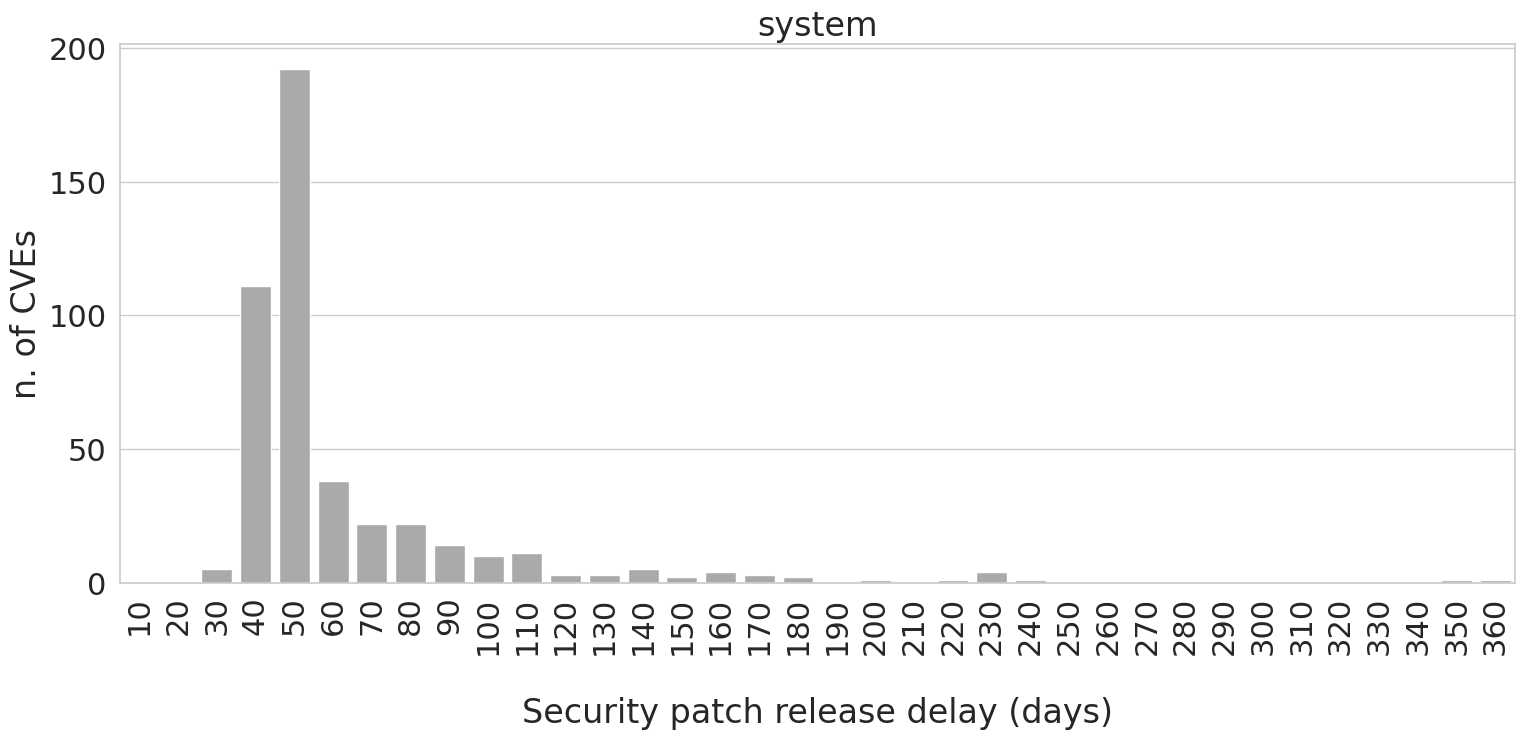

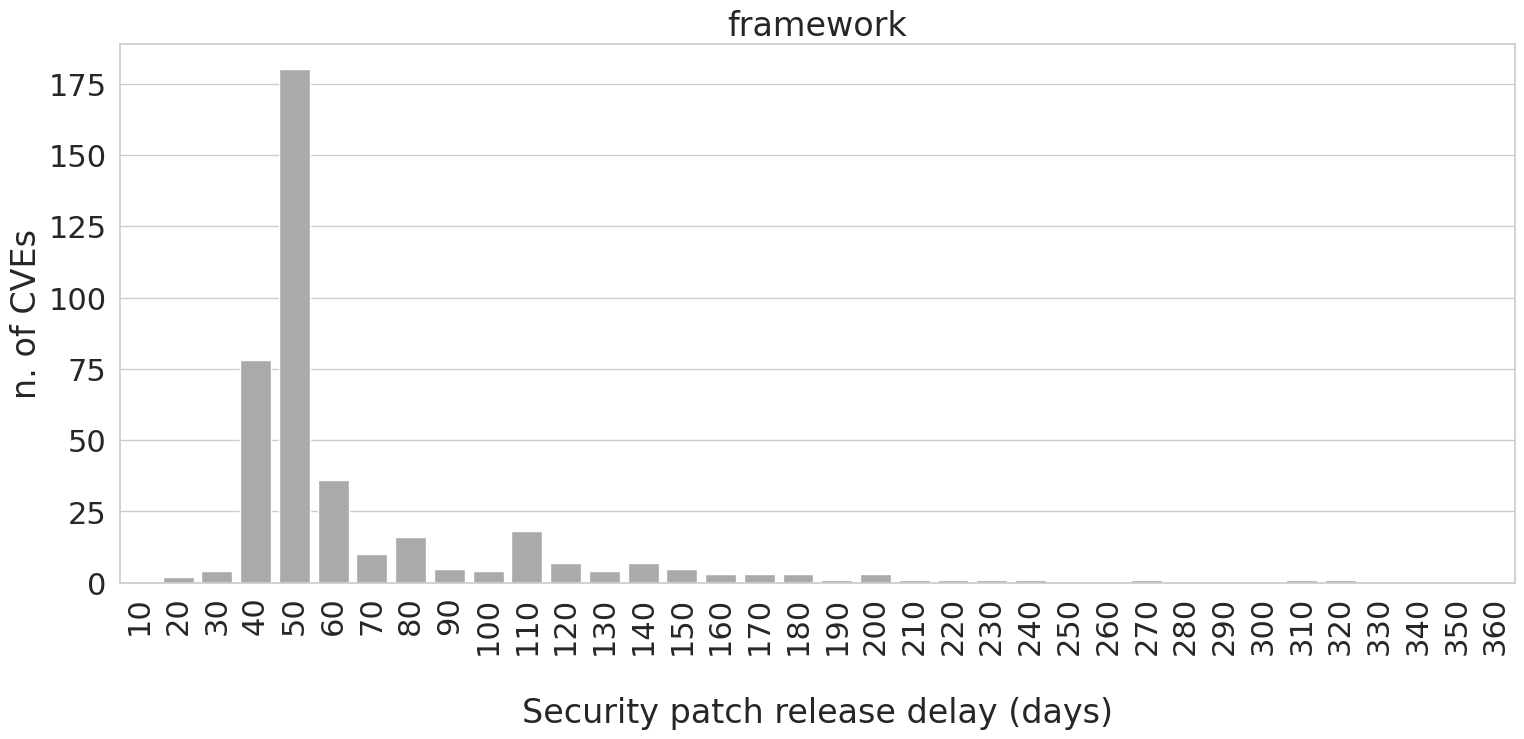

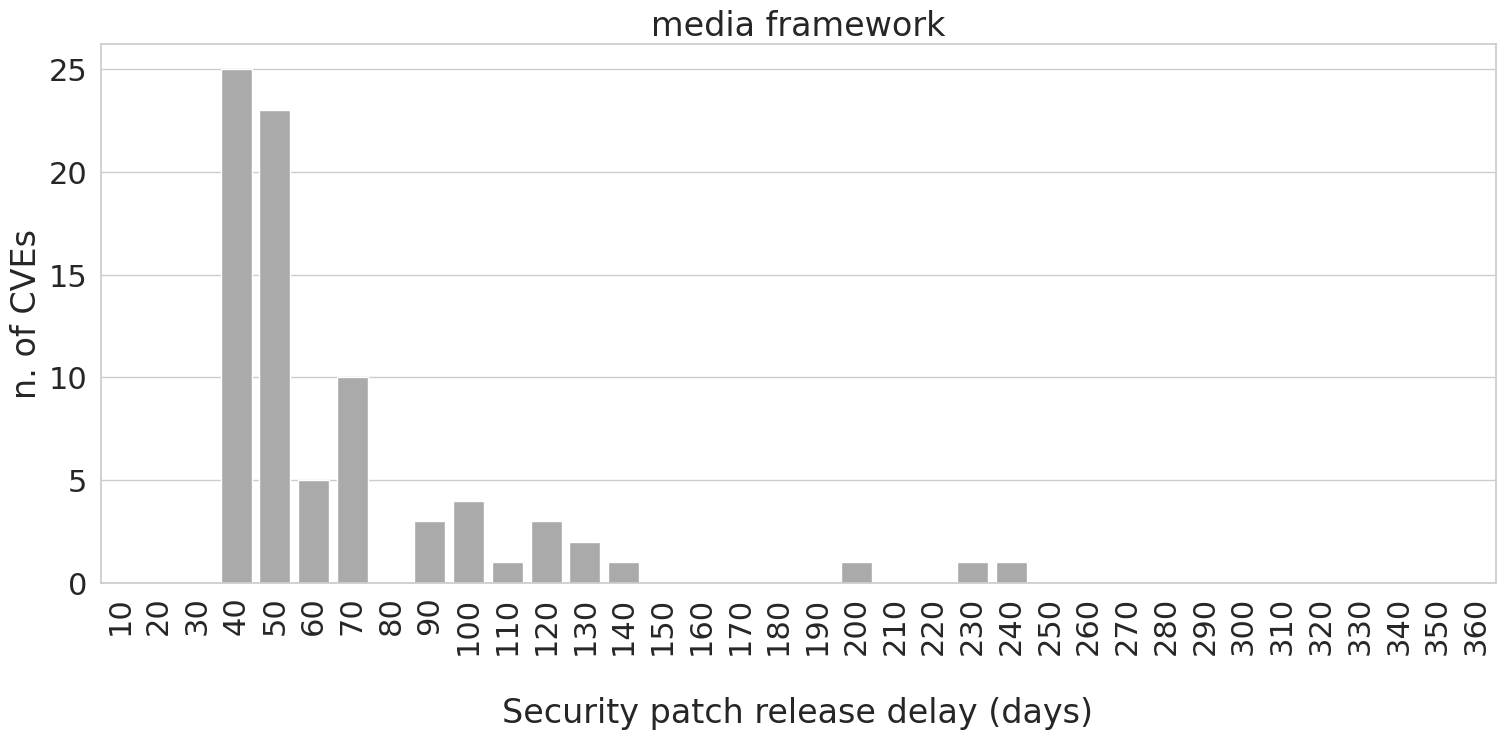

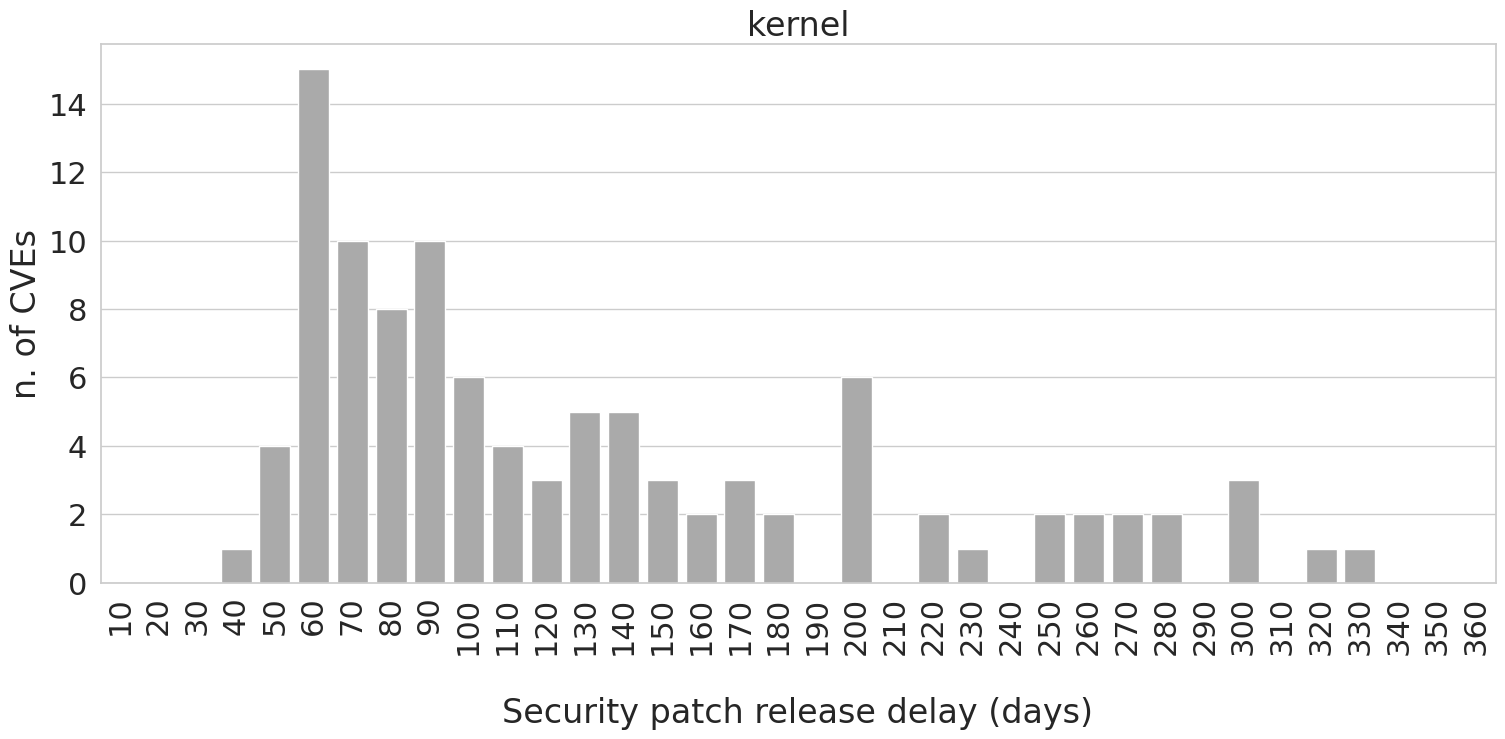

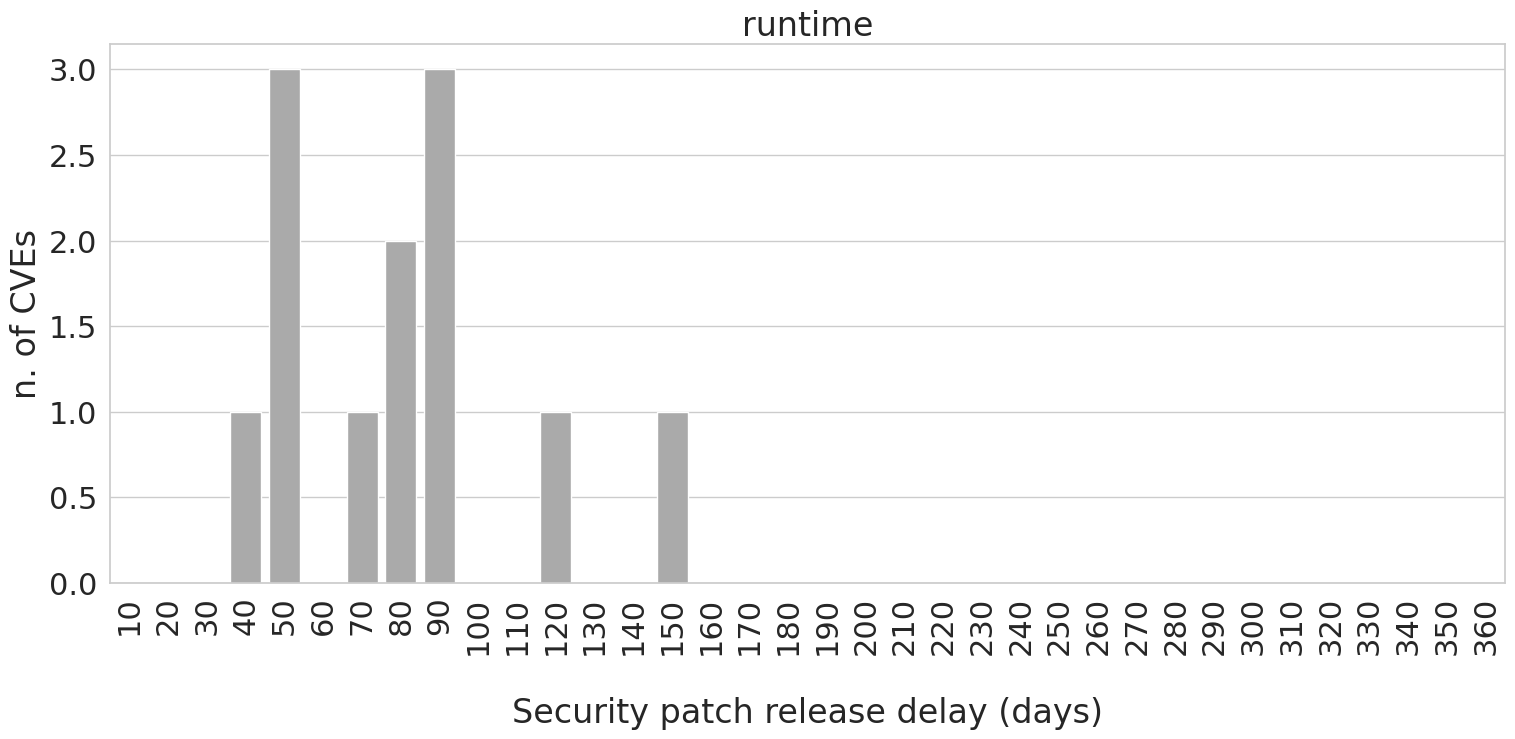

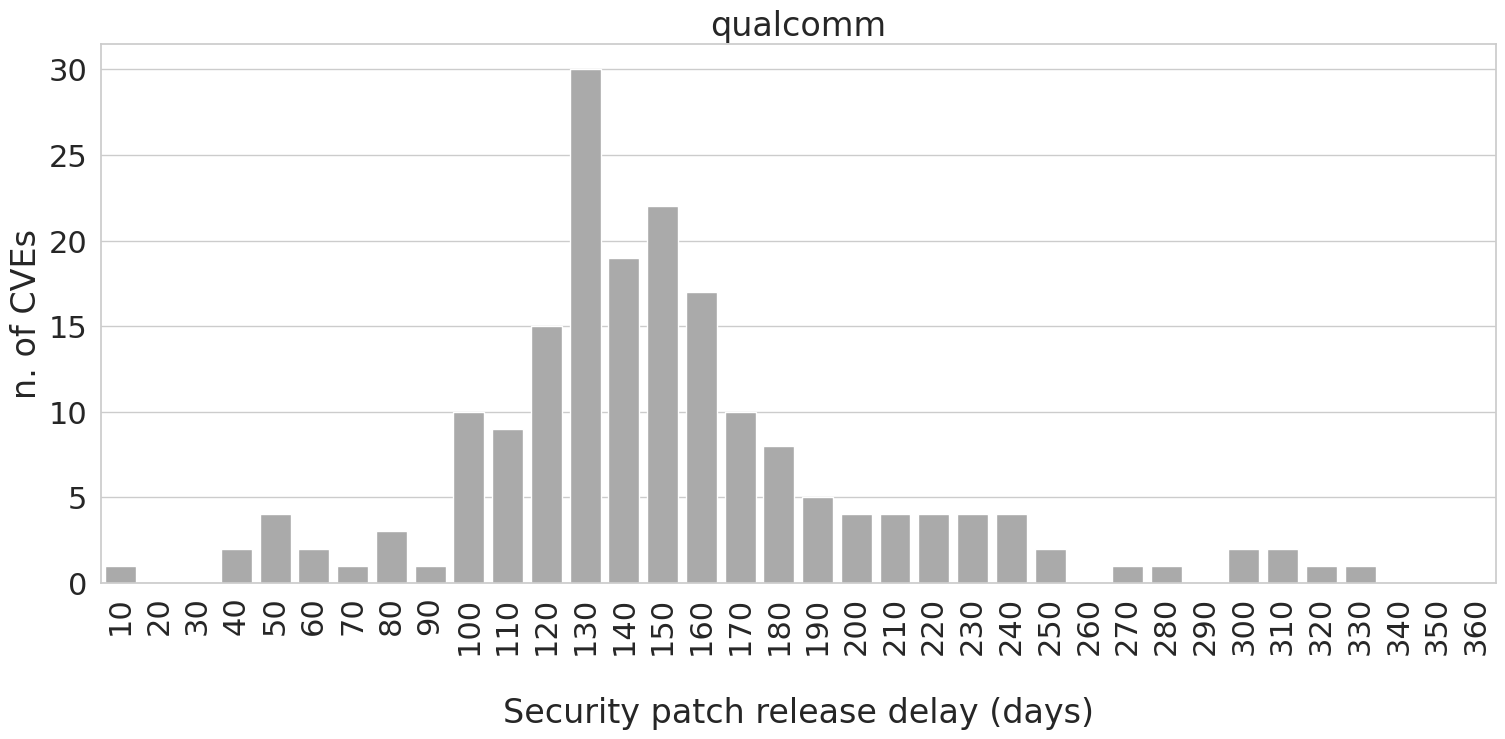

In [46]:
def get_bins(df):
  days = pd.DataFrame(df["diff"].transform(lambda x: x.days)).rename(columns={"diff": "days"})
  days["bin"] = days["days"] // 10 * 10
  arr = days.groupby("bin").count().reset_index().to_numpy()
  last = 10
  full_arr = []
  for row in arr:
    cur = int(row[0])
    while last < cur:
      full_arr.append([last, 0])
      last += 10
    full_arr.append([int(row[0]), row[1]])
    last = cur + 10
  while last <= 360:
    full_arr.append([last, 0])
    last += 10
  return pd.DataFrame(full_arr, columns=["bin", "days"])

def make_cat_plots(df):
  for cat in CATEGORIES:
    df_cat = df[df["category"] == cat]
    sns.set(rc = {'figure.figsize':(18,7),}, style="whitegrid")
    with sns.plotting_context("notebook", font_scale=2):
      # count = pd.DataFrame(days.groupby(lambda x: days.loc[x]["days"] // 10 * 10).count().reset_index()).rename(columns={"days": "n. of CVEs", "index": "Security patch release delay (days)"})
      # count = pd.DataFrame(days.groupby("bin").count().reset_index()).rename(columns={"days": "n. of CVEs", "bin": "Security patch release delay (days)"})
      count = get_bins(df_cat).rename(columns={"days": "n. of CVEs", "bin": "Security patch release delay (days)"})
      ax = sns.barplot(data=count, x="Security patch release delay (days)", y="n. of CVEs", color="#AAA")
      plt.xticks(rotation=90)
      text = ax.get_xlabel()
      plt.xlabel(text, labelpad=30)
      plt.title(cat)
      plt.show()

# days = pd.DataFrame(df_clean["diff"].transform(lambda x: x.days)).rename(columns={"diff": "days"})
# days["bin"] = days["days"] // 10 * 10

make_cat_plots(df_clean)
# get_bins(df_clean[df_clean["category"] == "kernel"])

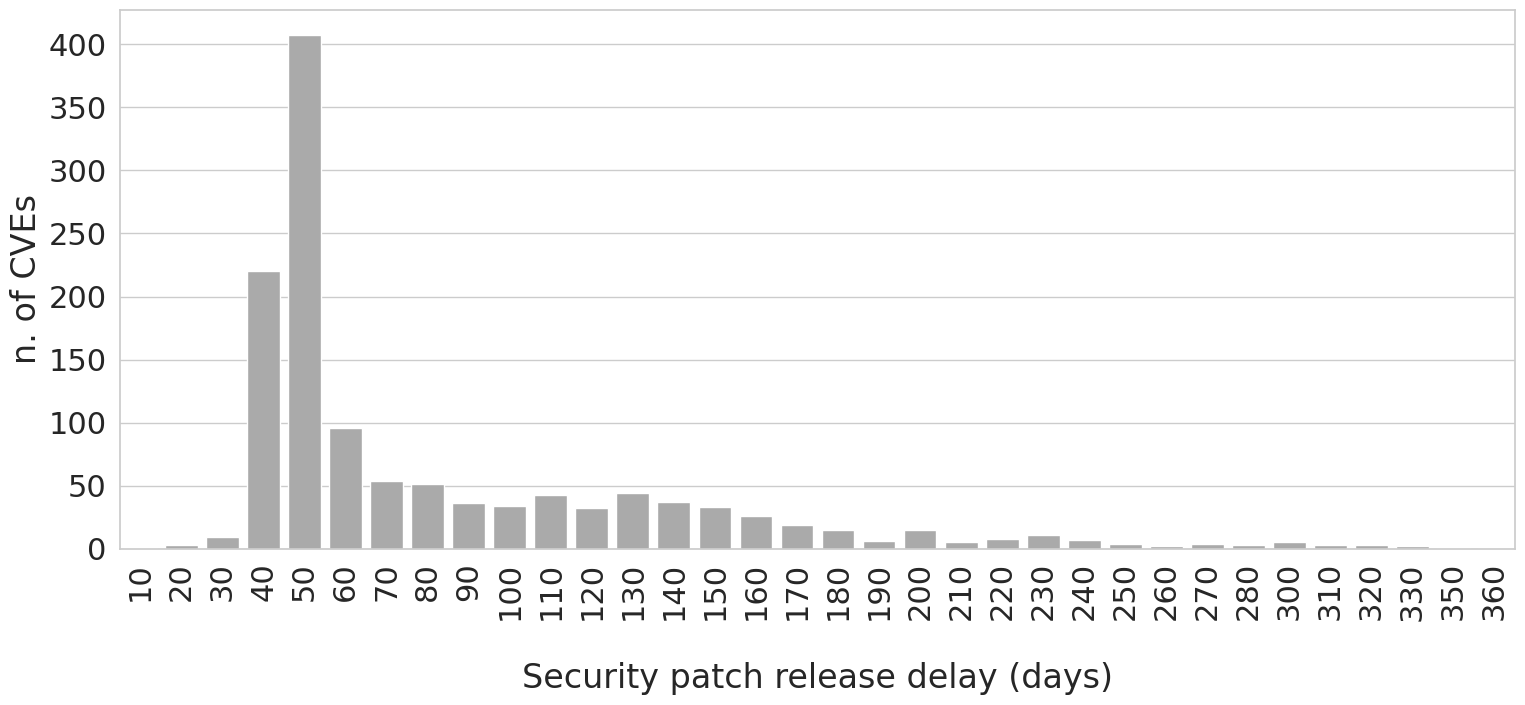

In [47]:
days = pd.DataFrame(diff_clean.transform(lambda x: x.days), columns=["days"])
sns.set(rc = {'figure.figsize':(18,7),}, style="whitegrid")
with sns.plotting_context("notebook", font_scale=2):
  count = pd.DataFrame(days.groupby(lambda x: days.loc[x]["days"] // 10 * 10).count().reset_index()).rename(columns={"days": "n. of CVEs", "index": "Security patch release delay (days)"})
  ax = sns.barplot(data=count, x="Security patch release delay (days)", y="n. of CVEs", color="#AAA")
  plt.xticks(rotation=90)
  text = ax.get_xlabel()
  plt.xlabel(text, labelpad=30)
  #sns.barplot(data=, x="days", y="count")


Some data with CVSS v3

In [48]:
# filter for recent bulletins, may remove

df = df[df['bulletin_date'].dt.tz_localize(None) >= np.datetime64('2018-01')]
df

,id,bulletin_date,patch_level,category,published,modified,commit_start,commit_end,nvd_severity,nvd_score,nvd_severity_v3,nvd_score_v3,bulletin_publish,diff
0,CVE-2021-0640,2021-08-01 00:00:00+00:00,2021-08-01,framework,2021-08-17 18:28:56+00:00,2024-08-03 15:47:28.206000+00:00,2021-05-20 03:12:46+00:00,2021-06-16 01:11:15+00:00,MEDIUM,4.6,HIGH,7.8,2021-08-02 00:00:00+00:00,46 days 22:48:45
1,CVE-2021-0645,2021-08-01 00:00:00+00:00,2021-08-01,framework,2021-08-17 18:28:06+00:00,2024-08-03 15:47:28.182000+00:00,2020-12-04 11:20:02+00:00,2021-06-16 01:11:20+00:00,MEDIUM,6.8,HIGH,7.8,2021-08-02 00:00:00+00:00,46 days 22:48:40
2,CVE-2021-0646,2021-08-01 00:00:00+00:00,2021-08-01,framework,2021-08-17 18:28:05+00:00,2024-08-03 15:47:28.248000+00:00,2021-06-03 15:08:20+00:00,2021-06-16 01:11:03+00:00,MEDIUM,4.6,HIGH,7.8,2021-08-02 00:00:00+00:00,46 days 22:48:57
3,CVE-2021-0519,2021-08-01 00:00:00+00:00,2021-08-01,media framework,2021-08-17 18:28:07+00:00,2024-08-03 15:40:01.132000+00:00,2021-03-10 04:33:39+00:00,2021-03-20 15:36:08+00:00,HIGH,7.2,HIGH,7.8,2021-08-02 00:00:00+00:00,134 days 08:23:52
4,CVE-2021-0591,2021-08-01 00:00:00+00:00,2021-08-01,system,2021-08-17 18:28:13+00:00,2024-08-03 15:47:28.227000+00:00,2021-03-12 02:40:20+00:00,2021-05-20 00:01:42+00:00,MEDIUM,6.8,HIGH,7.3,2021-08-02 00:00:00+00:00,73 days 23:58:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4481,CVE-2024-23362,2024-09-01 00:00:00+00:00,2024-09-01,qualcomm,NaT,2024-09-05 03:56:03.375000+00:00,NaT,NaT,NaN,NaN,NaN,NaN,2024-09-03 00:00:00+00:00,NaT
4482,CVE-2024-23364,2024-09-01 00:00:00+00:00,2024-09-01,qualcomm,NaT,2024-09-03 13:17:27.293000+00:00,NaT,NaT,NaN,NaN,NaN,NaN,2024-09-03 00:00:00+00:00,NaT
4483,CVE-2024-23365,2024-09-01 00:00:00+00:00,2024-09-01,qualcomm,NaT,2024-09-05 03:56:04.314000+00:00,NaT,NaT,NaN,NaN,NaN,NaN,2024-09-03 00:00:00+00:00,NaT
4484,CVE-2024-33016,2024-09-01 00:00:00+00:00,2024-09-01,qualcomm,NaT,2024-09-03 14:02:35.440000+00:00,NaT,NaT,NaN,NaN,NaN,NaN,2024-09-03 00:00:00+00:00,NaT


In [49]:
df["nvd_score_v3"].mean()

7.426630007855459

In [50]:
df[["id", "nvd_severity_v3"]].groupby("nvd_severity_v3").count()

,id
nvd_severity_v3,
CRITICAL,342
HIGH,1513
LOW,28
MEDIUM,663


# Samsung Patches

In [51]:
samsung_builds = "drive/My Drive/cves_temp/patches-valid-2024.csv"

devices = pd.read_csv(samsung_builds)
devices["release_date"] = pd.to_datetime(devices["release_date"], utc=True)
devices["patch_date"] = pd.to_datetime(devices["patch"].map(lambda x: date_dict[x]), utc=True)
devices["patch"] = pd.to_datetime(devices["patch"], utc=True)
devices

,id,model,csc,patch,release_date,build,patch_date
0,SM-S921B-EUX,SM-S921B,EUX,2024-12-01 00:00:00+00:00,2024-12-11 00:00:00+00:00,S921BXXS5AXKA,2024-12-02 00:00:00+00:00
1,SM-S921B-EUX,SM-S921B,EUX,2024-11-01 00:00:00+00:00,2024-12-02 00:00:00+00:00,S921BXXU5AXK4,2024-11-04 00:00:00+00:00
2,SM-S921B-EUX,SM-S921B,EUX,2024-11-01 00:00:00+00:00,2024-11-04 00:00:00+00:00,S921BXXS5AXJ8,2024-11-04 00:00:00+00:00
3,SM-S921B-EUX,SM-S921B,EUX,2024-10-01 00:00:00+00:00,2024-10-10 00:00:00+00:00,S921BXXS4AXI8,2024-10-07 00:00:00+00:00
4,SM-S921B-EUX,SM-S921B,EUX,2024-09-01 00:00:00+00:00,2024-09-25 00:00:00+00:00,S921BXXS3AXHD,2024-09-03 00:00:00+00:00
...,...,...,...,...,...,...,...
17798,SM-M205F-XSG,SM-M205F,XSG,2019-08-01 00:00:00+00:00,2019-10-04 00:00:00+00:00,M205FDDU2BSH3,2019-08-05 00:00:00+00:00
17799,SM-M205F-XSG,SM-M205F,XSG,2019-05-01 00:00:00+00:00,2019-07-22 00:00:00+00:00,M205FDDU1BSF4,2019-05-06 00:00:00+00:00
17800,SM-M205F-XSG,SM-M205F,XSG,2019-05-01 00:00:00+00:00,2019-06-22 00:00:00+00:00,M205FDDU1BSF1,2019-05-06 00:00:00+00:00
17801,SM-M205F-XSG,SM-M205F,XSG,2019-03-01 00:00:00+00:00,2019-04-27 00:00:00+00:00,M205FDDU1ASD3,2019-03-04 00:00:00+00:00


## Table of devices

Print the table of devices to include in Latex

In [52]:
ids = devices["id"].unique()


print("Model & CSC & Model & CSC & Model & CSC \\\\")
print ("\\hline")

cont = 0
line = ""
for id in ids:
  model, csc = id.rsplit("-", 1)
  line += f"{model} & {csc}"
  if cont == 2:
    print(f"{line} \\\\")
    line = ""
    cont = 0
  else:
    line += " & "
    cont += 1



Model & CSC & Model & CSC & Model & CSC \\
\hline
SM-S921B & EUX & SM-S921B & EVR & SM-S921B & INS \\
SM-S921B & CAU & SM-S921B & GTO & SM-S921B & ZTO \\
SM-S921B & XSG & SM-S921B & SER & SM-S926B & EUX \\
SM-S926B & EVR & SM-S926B & INS & SM-S926B & CAU \\
SM-S926B & GTO & SM-S926B & ZTO & SM-S926B & XSG \\
SM-S926B & SER & SM-S928B & EUX & SM-S928B & EVR \\
SM-S928B & INS & SM-S928B & CAU & SM-S928B & GTO \\
SM-S928B & ZTO & SM-S928B & XSG & SM-S928B & SER \\
SM-A556B & EUX & SM-A556B & EVR & SM-A356B & EUX \\
SM-A356B & EVR & SM-E156B & INS & SM-M556B & INS \\
SM-M556B & ZTO & SM-M356B & EUX & SM-M356B & INS \\
SM-M356B & ZTO & SM-A065F & INS & SM-A065F & CAU \\
SM-A065F & XSG & SM-A065F & SER & SM-A166B & EUX \\
SM-M146B & BRI & SM-M146B & INS & SM-M146B & CAU \\
SM-M146B & ZTO & SM-M146B & XSG & SM-M146B & SER \\
SM-A346N & KOO & SM-A546B & EUX & SM-A546B & EVR \\
SM-M546B & GTO & SM-M546B & ZTO & SM-M546B & XSG \\
SM-E146B & INS & SM-A245F & CAU & SM-A245F & XSG \\
SM-F731B & EUX

In [53]:
count = pd.DataFrame(devices.groupby("id")["id"].count())

## Number of devices

In [54]:
len(devices["id"].unique())

651

## Last security patch considered

In [55]:
devices["release_date"].max()

Timestamp('2024-12-30 00:00:00+0000', tz='UTC')

since there can be multiple updates with the same security patch level, we only keep the first for each model

In [56]:
devices = devices.sort_values(["id", "patch", "release_date"]).drop_duplicates(["id", "patch"])
#devices["prev_patch"] = devices["patch"].shift(1)
devices

,id,model,csc,patch,release_date,build,patch_date
14917,SM-A015F-CAU,SM-A015F,CAU,2020-03-01 00:00:00+00:00,2020-03-09 00:00:00+00:00,A015FXXU2ATB5,2020-03-02 00:00:00+00:00
14914,SM-A015F-CAU,SM-A015F,CAU,2020-06-01 00:00:00+00:00,2020-07-01 00:00:00+00:00,A015FXXS2ATF3,2020-06-01 00:00:00+00:00
14913,SM-A015F-CAU,SM-A015F,CAU,2020-08-01 00:00:00+00:00,2020-08-25 00:00:00+00:00,A015FXXU3ATG5,2020-08-03 00:00:00+00:00
14912,SM-A015F-CAU,SM-A015F,CAU,2020-09-01 00:00:00+00:00,2020-09-17 00:00:00+00:00,A015FXXU3ATI2,2020-09-08 00:00:00+00:00
14911,SM-A015F-CAU,SM-A015F,CAU,2020-11-01 00:00:00+00:00,2020-12-23 00:00:00+00:00,A015FXXS3ATL1,2020-11-02 00:00:00+00:00
...,...,...,...,...,...,...,...
2731,SM-X906B-ZTO,SM-X906B,ZTO,2023-02-01 00:00:00+00:00,2023-03-20 00:00:00+00:00,X906BXXU3BWB5,2023-02-06 00:00:00+00:00
2730,SM-X906B-ZTO,SM-X906B,ZTO,2023-05-01 00:00:00+00:00,2023-05-23 00:00:00+00:00,X906BXXU4BWD8,2023-05-01 00:00:00+00:00
2729,SM-X906B-ZTO,SM-X906B,ZTO,2023-07-01 00:00:00+00:00,2023-08-21 00:00:00+00:00,X906BXXS5BWH3,2023-07-05 00:00:00+00:00
2727,SM-X906B-ZTO,SM-X906B,ZTO,2023-10-01 00:00:00+00:00,2023-10-19 00:00:00+00:00,X906BXXS5BWJ1,2023-10-02 00:00:00+00:00


We define early updates as updates that are published before the bulletin, and late updates as updates that come more than 60 days after the bulletin publication.

We count the number of early and late updates, as well as the min, max, mean and median delay. We also calculate the 75 percentile, which indicates that minimum delay for the latest 25% of updates

mean: 25 days 01:47:22.353557856
median: 21 days 00:00:00
75 percentile: 32 days 00:00:00
min: -14 days +00:00:00
max: 168 days 00:00:00
number of early updates: 334/15262
number of late updates: 884/15262


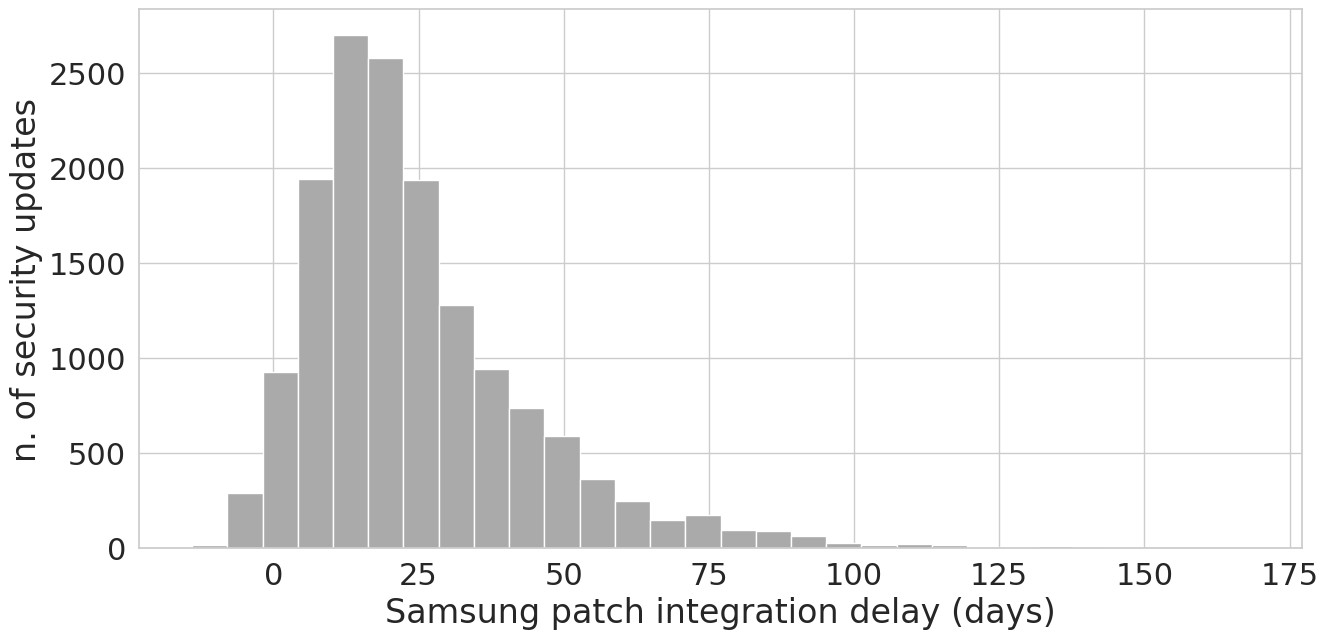

In [57]:
def show_devices(devices, bins=30):
  # compute difference between security_patch and its release date
  sam_diff = pd.DataFrame(devices["release_date"] - devices["patch_date"], columns=["diff"])
  # remove some outliers. Since some models have a 6-month release schedule, we
  # use 190 days as the upper bound
  sam_diff = sam_diff[sam_diff["diff"] < np.timedelta64(190, 'D')]
  late_num = sam_diff[sam_diff["diff"] >= np.timedelta64(60, 'D')].count()["diff"]
  early_num = sam_diff[sam_diff["diff"] < np.timedelta64(0)].count()["diff"]

  min_delay = sam_diff['diff'].min()
  max_delay = sam_diff['diff'].max()

  print(f"mean: {sam_diff['diff'].mean()}")
  print(f"median: {sam_diff['diff'].median()}")
  print(f"75 percentile: {sam_diff['diff'].quantile(0.75)}")
  print(f"min: {min_delay}")
  print(f"max: {max_delay}")
  print(f"number of early updates: {early_num}/{sam_diff.shape[0]}")
  print(f"number of late updates: {late_num}/{sam_diff.shape[0]}")
  sam_diff["days"] = sam_diff["diff"].map(lambda d: d.days)
  sns.set(rc = {'figure.figsize':(15,7)}, style="whitegrid")
  plt.figure()

  with sns.plotting_context("notebook", font_scale=2):
    sns.histplot(sam_diff["days"], bins=bins, color="#AAA", alpha=1)
    plt.xlabel("Samsung patch integration delay (days)")
    plt.ylabel("n. of security updates")
    #sam_diff["days"].hist( bins=30, figsize=(25,12))
    #plt.xticks(np.arange(min_delay.days, max_delay.days, 10))
    #ticks = np.linspace(min_delay.days, max_delay.days, bins)
    #plt.xticks(ticks=ticks, labels=ticks.astype(int))

show_devices(devices)

Since after a bulletin is published an update is not guaranteed to be published as well, we can compute the time between two successive updates

In [58]:
updates = pd.DataFrame(devices.sort_values(["id", "release_date"]))
updates["update_diff"] = pd.Timedelta("nan")
diff_col = updates.columns.get_loc('update_diff')
release_col = updates.columns.get_loc('release_date')
id_col = updates.columns.get_loc('id')

for i in range(1, len(updates)):
  if updates.iloc[i-1, id_col] == updates.iloc[i, id_col]:
    updates.iloc[i, diff_col] = updates.iloc[i, release_col] - updates.iloc[i-1, release_col]
updates["update_diff"] = pd.to_timedelta(updates["update_diff"])

<ipython-input-58-4e5af26c9d55>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '114 days 00:00:00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  updates.iloc[i, diff_col] = updates.iloc[i, release_col] - updates.iloc[i-1, release_col]


In [59]:
mean = updates["update_diff"].mean()
median = updates["update_diff"].median()
print(f"mean: {mean}")
print(f"median: {median}")

mean: 48 days 20:42:24.538735286
median: 37 days 00:00:00


## Stats with "fake" updates

These are the stats that in my opinion should be included in the paper

We can create "fake" updates for missing security patches, and set their release date as the release date of the next patch. For example, if a phone recceived updates with security patch level `2021-07-01` and `2021-09-01`, we can create a fake update with security patch level `2021-08-01` and use the release date of the `2021-09-01` as its release date. This way we take into account the fact that devices do not receive an update every month

In [60]:
fake_patches = []
for id in devices["id"].unique():
  filtered = devices[devices['id']==id]
  first_patch = filtered["patch"].iloc[0]
  last_patch = filtered["patch"].iloc[-1]
  #print(f"{first_patch -last_patch} {id}")
  date = last_patch
  cur_next = filtered["release_date"].iloc[-1]


  while date > first_patch:
    res = filtered[filtered['patch'] == date]
    if len(res) < 1:
      patch_date = pd.to_datetime(date_dict[date.strftime("%Y-%m-%d")], utc=True)
      fake_patches.append({"id": id, "patch":date, "release_date": cur_next, "patch_date": patch_date})
    else:
      cur_next = res["release_date"].iloc[0]
    date = date - pd.DateOffset(months=1)

fake_patches = pd.DataFrame(fake_patches)

In [61]:
devices_aug = pd.concat([devices, fake_patches])

mean: 46 days 09:47:56.273167473
median: 35 days 00:00:00
75 percentile: 67 days 00:00:00
min: -14 days +00:00:00
max: 189 days 00:00:00
number of early updates: 334/23956
number of late updates: 7020/23956


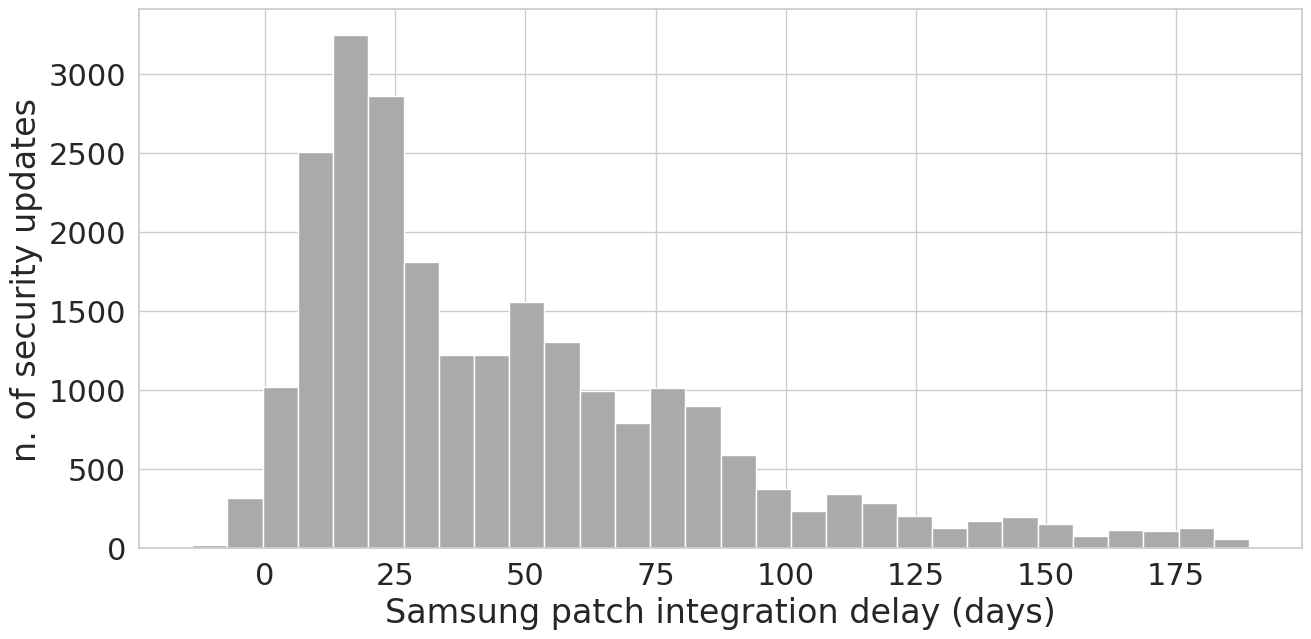

In [62]:
show_devices(devices_aug)